In [4]:
import time
import numpy as np

In [8]:
s = [["0", "0", "0", "0", "0", "0"],
     ["0", "X", "X", "X", "X", "0"],
     ["0", "0", "X", "X", "X", "0"],
     ["X", "X", "X", "X", "X", "0"],
     ["0", "X", "X", "X", "X", "0"],
     ["S", "0", "0", "0", "0", "0"]]

# s = [["0", "0", "0", "0", "0", "0"],
#      ["0", "X", "X", "X", "X", "0"],
#      ["0", "X", "X", "X", "X", "0"],
#      ["0", "X", "X", "X", "X", "0"],
#      ["0", "X", "X", "X", "X", "0"],
#      ["S", "0", "0", "0", "0", "0"]]

#Illegal Benchmark

# s = [["0", "0", "0", "0", "0", "0"],
#      ["0", "X", "X", "0", "X", "0"],
#      ["0", "0", "0", "0", "0", "0"],
#      ["X", "X", "X", "0", "X", "0"],
#      ["0", "X", "X", "0", "X", "0"],
#      ["S", "0", "0", "0", "0", "0"]]

# s = [["0", "0", "0", "0", "0", "0"],
#      ["0", "X", "X", "X", "X", "0"],
#      ["0", "0", "0", "0", "X", "0"],
#      ["X", "X", "X", "X", "X", "0"],
#      ["0", "X", "X", "0", "X", "0"],
#      ["0", "0", "0", "S", "0", "0"]]

#Code Documentation of Priority Queue Class

In [1]:
class PriorityQueue():
    def __init__(self):
        self.queue = list()

    def __str__(self):
        return ' '.join([str(i) for i in self.queue])
    
    def isEmpty(self):
        return (len(self.queue) == 0)

    def enqueue(self, s):
        self.queue.append(s)
        # print(s.f) #Debug
        self.queue = sorted(self.queue, key=lambda s: s.f) #s.f gives cost for UCS because its a special case of A* where h = 0

    def dequeue(self):
        if(len(self.queue) != 0):
            # print(self.queue[0].f)
            s = self.queue.pop(0)
            return s
        else:
            print("The priority queue is empty")
    
    def Length(self):
        return len(self.queue)

#Code Documentation of Node Class

In [2]:
class Node():
    def __init__(self, state, cost=0, parent=None, h = 0):
        self.state = state
        self.cost = cost
        self.parent = parent
        self.h = h
        self.f = (cost + h) #f value

    def __str__(self):
        emp_str = ""
        for i in self.state:
            emp_str += str(i) + '\n'
        return emp_str

#Code Documentation of Search Class

In [3]:
class Search():
  def __init__(self, init_state):
    self.init_state = init_state #Start state
    self.goal_state = [i[:] for i in self.init_state]
    self.num_cells = 0
    self.ucs_expanded = 0 #Expanded node count for UCS
    self.a_expanded = 0   #Expanded node count for A
    for i in range(len(self.goal_state)):
      for j in range(len(self.goal_state[0])):
        if(self.goal_state[i][j] == 'S' or self.goal_state[i][j] == "0"):
          self.num_cells += 1 #Total number of cells that can be colored
          self.goal_state[i][j] = "C" #filling goal state

  def AgentCoordinates(self, state):
    for i in range(len(state)):
      for j in range(len(state[0])):
        if(state[i][j] == 'S'):
          x, y = i, j  # coordinates of robot at given state
    return x,y

  def LegalActionFinder(self, state):
    LegalActionSet = set()
    #find x,y coordinates of agent
    x,y = self.AgentCoordinates(state)

    if(x-1 >= 0 and state[x-1][y] != "X"):
        LegalActionSet.add("u")
    if(x+1 <= len(state) - 1 and state[x+1][y] != "X"):
        LegalActionSet.add("d")
    if(y-1 >= 0 and state[x][y-1] != "X"):
        LegalActionSet.add("l")
    if(y+1 <= len(state[0]) - 1 and state[x][y+1] != "X"):
        LegalActionSet.add("r")

    return LegalActionSet

  def CostFinder(self, init_state, final_state):
    #finds the cost between n and n' --> c(n-->n') where n and n' are states
    x1,y1 = self.AgentCoordinates(init_state)
    x2,y2 = self.AgentCoordinates(final_state)
    return (abs(y2 - y1) if (y2-y1 != 0) else abs(x2-x1))

  def DeepCopy(self, state):
    return [i[:] for i in state]

  def Succ(self, state):
    SuccessorSet = list()
    LegalActions = self.LegalActionFinder(state) #find legal actions
    temp_state = self.DeepCopy(state)
    for i in LegalActions: #perform legal actions
      x,y = self.AgentCoordinates(temp_state)
      # print(x,y)
      if(i == "r"):
        while((y+1 <= len(temp_state[0]) - 1) and temp_state[x][y+1] != "X"):
          temp_state[x][y] = "C"
          y = y+1
      elif(i == "l"):
        while((y-1 >= 0) and temp_state[x][y-1] != "X"):
          temp_state[x][y] = "C"
          y = y-1
      elif(i == "u"):
        while((x-1 >= 0) and temp_state[x-1][y] != "X"):
          temp_state[x][y] = "C"
          x = x-1
      else:
        while((x+1 <= len(temp_state) - 1) and temp_state[x+1][y] != "X"):
          temp_state[x][y] = "C"
          x = x+1
      temp_state[x][y] = "S"
      SuccessorSet.append(temp_state)
      temp_state = self.DeepCopy(state)
    return SuccessorSet

  def Succ_Cost(self, state):
    R = self.Succ(state) #perform legal actions
    T = list()
    for i in R:
      cost = self.CostFinder(state, i) #gather cost for each legal action
      t = (cost, i)
      T.append(t) #return tuple of cost and state
    return T

  def GoalTest(self, state):
    temp = self.DeepCopy(state) #whether we are in goal state or not
    x,y = self.AgentCoordinates(temp)
    temp[x][y] = "C"
    return (temp == self.goal_state)

  def ExistClosed(self, state, Closed): #returns index of state from closed else -1
    is_exist = -1
    for i in range(len(Closed)):
      if(Closed[i].state == state):
        return i
    return is_exist
  
  def ExistFrontier(self, state, Frontier): #returns the index of state in pQueue else -1
    for i in range(Frontier.Length()):
      if(Frontier.queue[i].state == state):
        return i
    return -1

  def ExistFrontierWithBiggerCost(self, node, Frontier):
    for i in range(Frontier.Length()):
      if((Frontier.queue[i].state == node.state) and (Frontier.queue[i].f > node.f)): #if its UCS h will be 0 thus f(n) = cost = g(n)
        return i
    return -1

  def ExistClosedWithBiggerF(self, node, Closed):
    for i in range(len(Closed)):
      if((Closed[i].state == node.state) and (Closed[i].f > node.f)): #if its UCS h will be 0 thus f(n) = cost = g(n)
        return i
    return -1

  def UCS(self):
    Closed = list()
    Frontier = PriorityQueue()
    start_state = self.DeepCopy(self.init_state)
    n = Node(start_state)
    Frontier.enqueue(n)
    while(not Frontier.isEmpty()):
      node = Frontier.dequeue() #dequeue with min cost
      self.ucs_expanded += 1
      if(self.GoalTest(node.state)): #whether its a goal state
        return node #Solution(n) here
      for s in self.Succ_Cost(node.state): #each (cost, state) tupples 
        temp_node = Node(s[1], node.cost + s[0], node) #s[1]: state of successor, s[0]: cost to come this state, g(n') = g(n) + c(n -> n'), parent is the node itself
        if((self.ExistClosed(temp_node.state, Closed) == -1) and
           (self.ExistFrontier(temp_node.state, Frontier) == -1)): #if there is no n'' has a state s in Closed or Frontier
          Frontier.enqueue(temp_node)
        elif(self.ExistFrontierWithBiggerCost(temp_node, Frontier) != -1):
          i = self.ExistFrontierWithBiggerCost(temp_node, Frontier)
          #Update the cost state and parent information with new smaller cost node
          Frontier.queue[i].cost = temp_node.cost
          Frontier.queue[i].state = temp_node.state
          Frontier.queue[i].parent = temp_node.parent
        # elif():
      Closed.append(node)
    return -1

  def UCS_Cost(self): #calculate path cost
    node = self.UCS()
    total_dist = 0
    if(node == -1):
      return "Illegal instance"

    optimal_path = list()

    while(node != None):
      optimal_path.append(node)
      node = node.parent

    for i in range(len(optimal_path)):
      if(i+1 == len(optimal_path)-1):
        total_dist += self.CostFinder(optimal_path[i].state, optimal_path[i+1].state)
        return total_dist
      total_dist += self.CostFinder(optimal_path[i].state, optimal_path[i+1].state)

  def UCSPath(self):
    node = self.UCS()

    if(node == -1):
      return "There is no such optimal path exist"

    optimal_path = list()

    while(node != None):
      optimal_path.append(node)
      node = node.parent
    
    while(len(optimal_path) > 0 ):
      print(optimal_path.pop())

  def h(self, state): #Heuristic: count remaining 0's in field
    state_mt = np.array(state)
    count = np.count_nonzero(state_mt == "0")
    return (count) #returns the heuristic as real cost up to that state + min cost of successor states such that h(n) <= g(n->G) --> Admissible
    # h_list = list()
    # for s in self.Succ_Cost(state):
    #   h_list.append(s[0])
    # return min(h_list)

  def A_Search(self):
    Closed = list()
    Frontier = PriorityQueue()
    start_state = self.DeepCopy(self.init_state)
    n = Node(start_state)
    Frontier.enqueue(n)
    while(not Frontier.isEmpty()):
      node = Frontier.dequeue()
      self.a_expanded += 1
      if(self.GoalTest(node.state)):
        return node #Solution(n) here
      for s in self.Succ_Cost(node.state):
        g = node.cost + s[0]
        h = self.h(s[1]) #takes the parent node and s and returns a heuristic value
        # print(h)
        # print(s, h)
        temp_node = Node(s[1] , g, node, h) #n'==> s[1]: state of successor, s[0]: cost to come this state, g(n') = g(n) + c(n -> n'), parent is the node itself
        index_of_reopen = self.ExistClosedWithBiggerF(temp_node , Closed)
        index = self.ExistFrontierWithBiggerCost(temp_node, Frontier)
        if((self.ExistClosed(temp_node.state, Closed) == -1) and
           (self.ExistFrontier(temp_node.state, Frontier) == -1)): #if there is no n'' has a state s in Closed or Frontier
          Frontier.enqueue(temp_node)
        elif(index != -1):
          #Update the cost state and parent information with new smaller cost node
          Frontier.queue[index].cost = temp_node.cost
          Frontier.queue[index].state = temp_node.state
          Frontier.queue[index].parent = temp_node.parent
          Frontier.queue[index].f = temp_node.f
        #else if there is some n'' in closed s.t. n''.state = s[1] and f(n'') > f(n') --> reopen n'' in frontier with f(n'') = f(n')...
        elif(index_of_reopen != -1):
          print("a")
          Closed[index_of_reopen].f = temp_node.f
          Closed[index_of_reopen].cost = temp_node.cost
          Closed[index_of_reopen].state = temp_node.state
          Closed[index_of_reopen].parent = temp_node.parent

          reopened_node = Closed.pop(index_of_reopen) # To reopen we first need to wipe it out from closed list
          Frontier.enqueue(reopened_node)

        # Implement this and finish
        # elif():
      Closed.append(node)
    return -1 #no such path exist to goal state
      
  def APath(self): #the path
    node = self.A_Search()

    if(node == -1):
      return "There is no such optimal path exist"

    optimal_path = list()

    while(node != None):
      optimal_path.append(node)
      node = node.parent
    
    while(len(optimal_path) > 0 ):
      print(optimal_path.pop())

  def ACost(self): #cost of the path traced
    node = self.A_Search()
    total_dist = 0
    if(node == -1):
      return "Illegal instance"

    optimal_path = list()

    while(node != None):
      optimal_path.append(node)
      node = node.parent

    for i in range(len(optimal_path)):
      if(i+1 == len(optimal_path)-1):
        total_dist += self.CostFinder(optimal_path[i].state, optimal_path[i+1].state)
        return total_dist
      total_dist += self.CostFinder(optimal_path[i].state, optimal_path[i+1].state)

In [ ]:
s = [["0", "0", "0", "0", "0", "X", "0"],
     ["0", "X", "X", "X", "0", "X", "0"],
     ["0", "X", "X", "X", "0", "X", "0"],
     ["0", "X", "X", "X", "0", "X", "0"],
     ["0", "X", "X", "X", "0", "X", "0"],
     ["S", "0", "0", "0", "0", "0", "0"]]
S = Search(s)
S.APath()

['0', '0', '0', '0', '0', 'X', '0']
['0', 'X', 'X', 'X', '0', 'X', '0']
['0', 'X', 'X', 'X', '0', 'X', '0']
['0', 'X', 'X', 'X', '0', 'X', '0']
['0', 'X', 'X', 'X', '0', 'X', '0']
['S', '0', '0', '0', '0', '0', '0']

['S', '0', '0', '0', '0', 'X', '0']
['C', 'X', 'X', 'X', '0', 'X', '0']
['C', 'X', 'X', 'X', '0', 'X', '0']
['C', 'X', 'X', 'X', '0', 'X', '0']
['C', 'X', 'X', 'X', '0', 'X', '0']
['C', '0', '0', '0', '0', '0', '0']

['C', 'C', 'C', 'C', 'S', 'X', '0']
['C', 'X', 'X', 'X', '0', 'X', '0']
['C', 'X', 'X', 'X', '0', 'X', '0']
['C', 'X', 'X', 'X', '0', 'X', '0']
['C', 'X', 'X', 'X', '0', 'X', '0']
['C', '0', '0', '0', '0', '0', '0']

['C', 'C', 'C', 'C', 'C', 'X', '0']
['C', 'X', 'X', 'X', 'C', 'X', '0']
['C', 'X', 'X', 'X', 'C', 'X', '0']
['C', 'X', 'X', 'X', 'C', 'X', '0']
['C', 'X', 'X', 'X', 'C', 'X', '0']
['C', '0', '0', '0', 'S', '0', '0']

['C', 'C', 'C', 'C', 'C', 'X', '0']
['C', 'X', 'X', 'X', 'C', 'X', '0']
['C', 'X', 'X', 'X', 'C', 'X', '0']
['C', 'X', 'X', 'X', 'C'

#Benchmarks


###Easy Benchmarks

In these benchmarks, robot can directly go to the destination state without coloring the path that it was covered before.

In [12]:
e1= [["S", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
     ['X', 'X', 'X', 'X','X', 'X', 'X', 'X','X', '0'],
     ['0', '0', '0', '0','0', '0', '0', '0','X', '0'],
     ['0', 'X', 'X', 'X','X', 'X', 'X', '0','X', '0'],
     ['0', 'X', 'X', 'X','X', 'X', 'X', '0','X', '0'],
     ['0', 'X', '0', '0','0', 'X', 'X', '0','X', '0'],
     ['0', 'X', 'X', 'X','0', 'X', 'X', '0','X', '0'],
     ['0', 'X', 'X', 'X','0', '0', '0', '0','X', '0'],
     ['0', 'X', 'X', 'X','X', 'X', 'X', 'X','X', '0'],
     ['0', '0', '0', '0','0', '0', '0', '0','0', '0']]

e2= [["0", "0", "0", "0", "X", "0", "0", "0", "0", "0"],
     ['0', 'X', 'X', '0','X', '0', 'X', 'X','X', '0'],
     ['0', 'X', 'X', '0','X', '0', 'X', 'X','X', '0'],
     ['0', 'X', 'X', '0','X', '0', '0', '0','X', '0'],
     ['0', 'X', 'X', '0','X', 'X', 'X', 'X','X', '0'],
     ['0', 'X', 'X', '0','X', 'X', 'X', 'X','X', '0'],
     ['0', 'X', 'X', '0','0', '0', '0', '0','X', '0'],
     ['0', 'X', 'X', 'X','X', 'X', 'X', '0','X', '0'],
     ['0', 'X', 'X', 'X','X', 'X', 'X', '0','X', '0'],
     ['S', 'X', 'X', 'X','X', 'X', 'X', '0','0', '0']]

e3= [['X', 'X', 'X', 'X','X', 'X', 'X', 'X','X', 'X'],
     ['X', 'X', 'X', 'X','X', 'X', 'X', 'X','X', 'X'],
     ['X', '0', '0', '0','0', '0', '0', '0','0', '0'],
     ['X', '0', 'X', 'X','X', 'X', 'X', 'X','X', '0'],
     ['X', '0', 'X', '0','0', '0', '0', '0','X', '0'],
     ['X', '0', 'X', '0','X', 'X', 'X', '0','X', '0'],
     ['X', '0', 'X', 'X','X', 'X', 'X', '0','X', '0'],
     ['X', '0', '0', '0','0', '0', '0', '0','X', '0'],
     ['X', 'X', 'X', 'X','X', 'X', 'X', 'X','X', '0'],
     ["S", "0", "0", "0", "0", "0", "0", "0", "0", "0"]]

e4= [['X', '0', '0', '0','0', '0', 'X', 'X','X', 'S'],
     ['X', '0', 'X', 'X','X', '0', 'X', 'X','X', '0'],
     ['X', '0', 'X', 'X','X', '0', 'X', 'X','X', '0'],
     ['X', '0', 'X', '0','X', '0', 'X', 'X','X', '0'],
     ['X', '0', 'X', '0','X', '0', 'X', 'X','X', '0'],
     ['X', '0', 'X', '0','X', '0', 'X', 'X','X', '0'],
     ['X', '0', 'X', '0','X', '0', '0', '0','X', '0'],
     ['X', '0', 'X', '0','0', '0', '0', '0','X', '0'],
     ['X', '0', 'X', 'X','X', 'X', 'X', 'X','X', '0'],
     ["X", "0", "0", "0", "0", "0", "0", "0", "0", "0"]]

e5= [["X", "X", "X", "X", "X", "X", "X", "X", "X", "X"],
     ['X', 'X', 'X', 'X','X', 'X', 'X', 'X','X', 'X'],
     ['X', 'X', 'X', 'X','X', 'X', 'X', 'X','X', 'X'],
     ['X', 'X', 'X', 'X','X', 'X', 'X', 'X','X', 'X'],
     ["S", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
     ['X', 'X', 'X', 'X','X', 'X', 'X', 'X','X', '0'],
     ['0', 'X', '0', '0','0', '0', 'X', 'X','X', '0'],
     ['0', 'X', '0', 'X','X', '0', 'X', 'X','X', '0'],
     ['0', 'X', '0', 'X','X', '0', 'X', 'X','X', '0'],
     ['0', '0', '0', 'X','X', '0', '0', '0','0', '0']]

######UCS

In [30]:
S = Search(e1)
S.UCSPath()

['S', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['0', '0', '0', '0', '0', '0', '0', '0', 'X', '0']
['0', 'X', 'X', 'X', 'X', 'X', 'X', '0', 'X', '0']
['0', 'X', 'X', 'X', 'X', 'X', 'X', '0', 'X', '0']
['0', 'X', '0', '0', '0', 'X', 'X', '0', 'X', '0']
['0', 'X', 'X', 'X', '0', 'X', 'X', '0', 'X', '0']
['0', 'X', 'X', 'X', '0', '0', '0', '0', 'X', '0']
['0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']

['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'S']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['0', '0', '0', '0', '0', '0', '0', '0', 'X', '0']
['0', 'X', 'X', 'X', 'X', 'X', 'X', '0', 'X', '0']
['0', 'X', 'X', 'X', 'X', 'X', 'X', '0', 'X', '0']
['0', 'X', '0', '0', '0', 'X', 'X', '0', 'X', '0']
['0', 'X', 'X', 'X', '0', 'X', 'X', '0', 'X', '0']
['0', 'X', 'X', 'X', '0', '0', '0', '0', 'X', '0']
['0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['0', '0', '0', '0', '0', '0',

In [31]:
S = Search(e2)
S.UCSPath()

['0', '0', '0', '0', 'X', '0', '0', '0', '0', '0']
['0', 'X', 'X', '0', 'X', '0', 'X', 'X', 'X', '0']
['0', 'X', 'X', '0', 'X', '0', 'X', 'X', 'X', '0']
['0', 'X', 'X', '0', 'X', '0', '0', '0', 'X', '0']
['0', 'X', 'X', '0', 'X', 'X', 'X', 'X', 'X', '0']
['0', 'X', 'X', '0', 'X', 'X', 'X', 'X', 'X', '0']
['0', 'X', 'X', '0', '0', '0', '0', '0', 'X', '0']
['0', 'X', 'X', 'X', 'X', 'X', 'X', '0', 'X', '0']
['0', 'X', 'X', 'X', 'X', 'X', 'X', '0', 'X', '0']
['S', 'X', 'X', 'X', 'X', 'X', 'X', '0', '0', '0']

['S', '0', '0', '0', 'X', '0', '0', '0', '0', '0']
['C', 'X', 'X', '0', 'X', '0', 'X', 'X', 'X', '0']
['C', 'X', 'X', '0', 'X', '0', 'X', 'X', 'X', '0']
['C', 'X', 'X', '0', 'X', '0', '0', '0', 'X', '0']
['C', 'X', 'X', '0', 'X', 'X', 'X', 'X', 'X', '0']
['C', 'X', 'X', '0', 'X', 'X', 'X', 'X', 'X', '0']
['C', 'X', 'X', '0', '0', '0', '0', '0', 'X', '0']
['C', 'X', 'X', 'X', 'X', 'X', 'X', '0', 'X', '0']
['C', 'X', 'X', 'X', 'X', 'X', 'X', '0', 'X', '0']
['C', 'X', 'X', 'X', 'X', 'X',

In [32]:
S = Search(e3)
S.UCSPath()

['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
['X', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['X', '0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['X', '0', 'X', '0', '0', '0', '0', '0', 'X', '0']
['X', '0', 'X', '0', 'X', 'X', 'X', '0', 'X', '0']
['X', '0', 'X', 'X', 'X', 'X', 'X', '0', 'X', '0']
['X', '0', '0', '0', '0', '0', '0', '0', 'X', '0']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['S', '0', '0', '0', '0', '0', '0', '0', '0', '0']

['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
['X', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['X', '0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['X', '0', 'X', '0', '0', '0', '0', '0', 'X', '0']
['X', '0', 'X', '0', 'X', 'X', 'X', '0', 'X', '0']
['X', '0', 'X', 'X', 'X', 'X', 'X', '0', 'X', '0']
['X', '0', '0', '0', '0', '0', '0', '0', 'X', '0']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['C', 'C', 'C', 'C', 'C', 'C',

In [33]:
S = Search(e4)
S.UCSPath()

['X', '0', '0', '0', '0', '0', 'X', 'X', 'X', 'S']
['X', '0', 'X', 'X', 'X', '0', 'X', 'X', 'X', '0']
['X', '0', 'X', 'X', 'X', '0', 'X', 'X', 'X', '0']
['X', '0', 'X', '0', 'X', '0', 'X', 'X', 'X', '0']
['X', '0', 'X', '0', 'X', '0', 'X', 'X', 'X', '0']
['X', '0', 'X', '0', 'X', '0', 'X', 'X', 'X', '0']
['X', '0', 'X', '0', 'X', '0', '0', '0', 'X', '0']
['X', '0', 'X', '0', '0', '0', '0', '0', 'X', '0']
['X', '0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['X', '0', '0', '0', '0', '0', '0', '0', '0', '0']

['X', '0', '0', '0', '0', '0', 'X', 'X', 'X', 'C']
['X', '0', 'X', 'X', 'X', '0', 'X', 'X', 'X', 'C']
['X', '0', 'X', 'X', 'X', '0', 'X', 'X', 'X', 'C']
['X', '0', 'X', '0', 'X', '0', 'X', 'X', 'X', 'C']
['X', '0', 'X', '0', 'X', '0', 'X', 'X', 'X', 'C']
['X', '0', 'X', '0', 'X', '0', 'X', 'X', 'X', 'C']
['X', '0', 'X', '0', 'X', '0', '0', '0', 'X', 'C']
['X', '0', 'X', '0', '0', '0', '0', '0', 'X', 'C']
['X', '0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'C']
['X', '0', '0', '0', '0', '0',

In [34]:
S = Search(e5)
S.UCSPath()

['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
['S', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['0', 'X', '0', '0', '0', '0', 'X', 'X', 'X', '0']
['0', 'X', '0', 'X', 'X', '0', 'X', 'X', 'X', '0']
['0', 'X', '0', 'X', 'X', '0', 'X', 'X', 'X', '0']
['0', '0', '0', 'X', 'X', '0', '0', '0', '0', '0']

['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'S']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['0', 'X', '0', '0', '0', '0', 'X', 'X', 'X', '0']
['0', 'X', '0', 'X', 'X', '0', 'X', 'X', 'X', '0']
['0', 'X', '0', 'X', 'X', '0', 'X', 'X', 'X', '0']
['0', '0', '0', 'X', 'X', '0',

######A*

In [13]:
S = Search(e1)
S.APath()

['S', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['0', '0', '0', '0', '0', '0', '0', '0', 'X', '0']
['0', 'X', 'X', 'X', 'X', 'X', 'X', '0', 'X', '0']
['0', 'X', 'X', 'X', 'X', 'X', 'X', '0', 'X', '0']
['0', 'X', '0', '0', '0', 'X', 'X', '0', 'X', '0']
['0', 'X', 'X', 'X', '0', 'X', 'X', '0', 'X', '0']
['0', 'X', 'X', 'X', '0', '0', '0', '0', 'X', '0']
['0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']

['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'S']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['0', '0', '0', '0', '0', '0', '0', '0', 'X', '0']
['0', 'X', 'X', 'X', 'X', 'X', 'X', '0', 'X', '0']
['0', 'X', 'X', 'X', 'X', 'X', 'X', '0', 'X', '0']
['0', 'X', '0', '0', '0', 'X', 'X', '0', 'X', '0']
['0', 'X', 'X', 'X', '0', 'X', 'X', '0', 'X', '0']
['0', 'X', 'X', 'X', '0', '0', '0', '0', 'X', '0']
['0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['0', '0', '0', '0', '0', '0',

In [14]:
S = Search(e2)
S.APath()

['0', '0', '0', '0', 'X', '0', '0', '0', '0', '0']
['0', 'X', 'X', '0', 'X', '0', 'X', 'X', 'X', '0']
['0', 'X', 'X', '0', 'X', '0', 'X', 'X', 'X', '0']
['0', 'X', 'X', '0', 'X', '0', '0', '0', 'X', '0']
['0', 'X', 'X', '0', 'X', 'X', 'X', 'X', 'X', '0']
['0', 'X', 'X', '0', 'X', 'X', 'X', 'X', 'X', '0']
['0', 'X', 'X', '0', '0', '0', '0', '0', 'X', '0']
['0', 'X', 'X', 'X', 'X', 'X', 'X', '0', 'X', '0']
['0', 'X', 'X', 'X', 'X', 'X', 'X', '0', 'X', '0']
['S', 'X', 'X', 'X', 'X', 'X', 'X', '0', '0', '0']

['S', '0', '0', '0', 'X', '0', '0', '0', '0', '0']
['C', 'X', 'X', '0', 'X', '0', 'X', 'X', 'X', '0']
['C', 'X', 'X', '0', 'X', '0', 'X', 'X', 'X', '0']
['C', 'X', 'X', '0', 'X', '0', '0', '0', 'X', '0']
['C', 'X', 'X', '0', 'X', 'X', 'X', 'X', 'X', '0']
['C', 'X', 'X', '0', 'X', 'X', 'X', 'X', 'X', '0']
['C', 'X', 'X', '0', '0', '0', '0', '0', 'X', '0']
['C', 'X', 'X', 'X', 'X', 'X', 'X', '0', 'X', '0']
['C', 'X', 'X', 'X', 'X', 'X', 'X', '0', 'X', '0']
['C', 'X', 'X', 'X', 'X', 'X',

In [15]:
S = Search(e3)
S.APath()

['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
['X', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['X', '0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['X', '0', 'X', '0', '0', '0', '0', '0', 'X', '0']
['X', '0', 'X', '0', 'X', 'X', 'X', '0', 'X', '0']
['X', '0', 'X', 'X', 'X', 'X', 'X', '0', 'X', '0']
['X', '0', '0', '0', '0', '0', '0', '0', 'X', '0']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['S', '0', '0', '0', '0', '0', '0', '0', '0', '0']

['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
['X', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['X', '0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['X', '0', 'X', '0', '0', '0', '0', '0', 'X', '0']
['X', '0', 'X', '0', 'X', 'X', 'X', '0', 'X', '0']
['X', '0', 'X', 'X', 'X', 'X', 'X', '0', 'X', '0']
['X', '0', '0', '0', '0', '0', '0', '0', 'X', '0']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['C', 'C', 'C', 'C', 'C', 'C',

In [16]:
S = Search(e4)
S.APath()

['X', '0', '0', '0', '0', '0', 'X', 'X', 'X', 'S']
['X', '0', 'X', 'X', 'X', '0', 'X', 'X', 'X', '0']
['X', '0', 'X', 'X', 'X', '0', 'X', 'X', 'X', '0']
['X', '0', 'X', '0', 'X', '0', 'X', 'X', 'X', '0']
['X', '0', 'X', '0', 'X', '0', 'X', 'X', 'X', '0']
['X', '0', 'X', '0', 'X', '0', 'X', 'X', 'X', '0']
['X', '0', 'X', '0', 'X', '0', '0', '0', 'X', '0']
['X', '0', 'X', '0', '0', '0', '0', '0', 'X', '0']
['X', '0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['X', '0', '0', '0', '0', '0', '0', '0', '0', '0']

['X', '0', '0', '0', '0', '0', 'X', 'X', 'X', 'C']
['X', '0', 'X', 'X', 'X', '0', 'X', 'X', 'X', 'C']
['X', '0', 'X', 'X', 'X', '0', 'X', 'X', 'X', 'C']
['X', '0', 'X', '0', 'X', '0', 'X', 'X', 'X', 'C']
['X', '0', 'X', '0', 'X', '0', 'X', 'X', 'X', 'C']
['X', '0', 'X', '0', 'X', '0', 'X', 'X', 'X', 'C']
['X', '0', 'X', '0', 'X', '0', '0', '0', 'X', 'C']
['X', '0', 'X', '0', '0', '0', '0', '0', 'X', 'C']
['X', '0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'C']
['X', '0', '0', '0', '0', '0',

In [17]:
S = Search(e5)
S.APath()

['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
['S', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['0', 'X', '0', '0', '0', '0', 'X', 'X', 'X', '0']
['0', 'X', '0', 'X', 'X', '0', 'X', 'X', 'X', '0']
['0', 'X', '0', 'X', 'X', '0', 'X', 'X', 'X', '0']
['0', '0', '0', 'X', 'X', '0', '0', '0', '0', '0']

['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'S']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['0', 'X', '0', '0', '0', '0', 'X', 'X', 'X', '0']
['0', 'X', '0', 'X', 'X', '0', 'X', 'X', 'X', '0']
['0', 'X', '0', 'X', 'X', '0', 'X', 'X', 'X', '0']
['0', '0', '0', 'X', 'X', '0',

###Normal Benchmarks

In these benchmark, the robot can trace back the route that it was covered before and cover it again. It can perform all of the legal actions (going up, down, right, left). 

In [18]:
n1= [["S", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
     ['X', 'X', 'X', 'X','X', 'X', 'X', 'X','X', '0'],
     ['0', 'X', '0', 'X','0', '0', '0', 'X','X', '0'],
     ['0', 'X', '0', '0','0', '0', 'X', '0','0', '0'],
     ['0', 'X', '0', 'X','X', '0', 'X', '0','0', '0'],
     ['0', 'X', '0', 'X','X', '0', 'X', '0','0', '0'],
     ['0', 'X', '0', 'X','X', '0', 'X', '0','0', '0'],
     ['0', 'X', '0', 'X','0', '0', 'X', '0','0', '0'],
     ['0', 'X', '0', 'X','0', '0', '0', '0','0', '0'],
     ['0', '0', '0', 'X','X', 'X', 'X', 'X','0', '0']]

n2= [["0", "0", "0", "0", "0", "0", "X", "X", "X", "X"],
     ['0', 'X', 'X', 'X','X', '0', 'X', 'X','X', 'X'],
     ['0', 'X', '0', '0','X', '0', 'X', '0','0', 'X'],
     ['0', 'X', '0', '0','X', '0', 'X', '0','0', 'X'],
     ['0', 'X', '0', 'X','X', '0', 'X', '0','0', 'X'],
     ['0', 'X', '0', 'X','X', '0', 'X', '0','0', 'X'],
     ['0', 'X', '0', '0','0', '0', '0', '0','X', 'X'],
     ['0', 'X', 'X', 'X','X', 'X', 'X', 'X','0', '0'],
     ['0', 'X', 'X', 'X','X', 'X', 'X', 'X','X', '0'],
     ['S', '0', '0', '0','0', '0', '0', '0','0', '0']]

n3= [['0', '0', '0', 'X','0', '0', '0', 'X','0', '0'],
     ['X', 'X', '0', 'X','0', '0', '0', '0','0', '0'],
     ['X', '0', '0', 'X','X', 'X', 'X', 'X','X', '0'],
     ['X', '0', '0', '0','0', '0', 'X', 'X','X', '0'],
     ['0', '0', '0', '0','0', '0', 'X', 'X','X', '0'],
     ['0', 'X', 'X', 'X','X', '0', 'X', 'X','X', '0'],
     ['0', 'X', 'X', 'X','X', '0', 'X', 'X','X', '0'],
     ['S', 'X', 'X', 'X','0', '0', '0', 'X','X', '0'],
     ['0', 'X', 'X', 'X','X', 'X', 'X', 'X','X', '0'],
     ["0", "0", "0", "0", "0", "0", "0", "0","0","0"]]

n4= [['0', '0', '0', '0','0', '0', '0', '0','0', 'S'],
     ['0', 'X', 'X', 'X','X', 'X', 'X', 'X','X', '0'],
     ['0', 'X', 'X', 'X','X', 'X', 'X', 'X','X', '0'],
     ['0', 'X', 'X', 'X','0', '0', '0', 'X','X', '0'],
     ['0', '0', '0', '0','0', 'X', '0', 'X','X', '0'],
     ['X', 'X', 'X', 'X','X', 'X', '0', 'X','X', '0'],
     ['0', '0', '0', '0','0', '0', '0', '0','X', '0'],
     ['0', '0', '0', '0','0', '0', 'X', 'X','X', '0'],
     ['X', 'X', 'X', 'X','0', '0', '0', '0','X', '0'],
     ["X", "X", "0", "0","0", "X", "0", "0","X", "0"]]

n5= [["0", "0", "X", "0","0","0", "X", "0", "0","0"],
     ['0', '0', '0', '0','X','0', '0', '0','X', '0'],
     ['0', 'X', '0', '0','0','X', '0', '0','X', '0'],
     ['X', 'X', 'X', 'X','X','X', 'X', 'X','X', '0'],
     ["S", "0", "0", "0", "0","0","0","0","0","0"],
     ['X', 'X', 'X', 'X','X', 'X', 'X', 'X','X', '0'],
     ['X', '0', '0', '0','0', '0', '0', '0','X', '0'],
     ['X', '0', 'X', 'X','X', 'X', 'X', '0','X', '0'],
     ['0', '0', '0', '0','0', '0', 'X', '0','X', '0'],
     ['0', '0', 'X', 'X','0', '0', 'X', '0','0', '0']]

######UCS

In [35]:
S = Search(n1)
S.UCSPath()

['S', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['0', 'X', '0', 'X', '0', '0', '0', 'X', 'X', '0']
['0', 'X', '0', '0', '0', '0', 'X', '0', '0', '0']
['0', 'X', '0', 'X', 'X', '0', 'X', '0', '0', '0']
['0', 'X', '0', 'X', 'X', '0', 'X', '0', '0', '0']
['0', 'X', '0', 'X', 'X', '0', 'X', '0', '0', '0']
['0', 'X', '0', 'X', '0', '0', 'X', '0', '0', '0']
['0', 'X', '0', 'X', '0', '0', '0', '0', '0', '0']
['0', '0', '0', 'X', 'X', 'X', 'X', 'X', '0', '0']

['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'S']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['0', 'X', '0', 'X', '0', '0', '0', 'X', 'X', '0']
['0', 'X', '0', '0', '0', '0', 'X', '0', '0', '0']
['0', 'X', '0', 'X', 'X', '0', 'X', '0', '0', '0']
['0', 'X', '0', 'X', 'X', '0', 'X', '0', '0', '0']
['0', 'X', '0', 'X', 'X', '0', 'X', '0', '0', '0']
['0', 'X', '0', 'X', '0', '0', 'X', '0', '0', '0']
['0', 'X', '0', 'X', '0', '0', '0', '0', '0', '0']
['0', '0', '0', 'X', 'X', 'X',

In [36]:
S = Search(n2)
S.UCSPath()

['0', '0', '0', '0', '0', '0', 'X', 'X', 'X', 'X']
['0', 'X', 'X', 'X', 'X', '0', 'X', 'X', 'X', 'X']
['0', 'X', '0', '0', 'X', '0', 'X', '0', '0', 'X']
['0', 'X', '0', '0', 'X', '0', 'X', '0', '0', 'X']
['0', 'X', '0', 'X', 'X', '0', 'X', '0', '0', 'X']
['0', 'X', '0', 'X', 'X', '0', 'X', '0', '0', 'X']
['0', 'X', '0', '0', '0', '0', '0', '0', 'X', 'X']
['0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0', '0']
['0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['S', '0', '0', '0', '0', '0', '0', '0', '0', '0']

['0', '0', '0', '0', '0', '0', 'X', 'X', 'X', 'X']
['0', 'X', 'X', 'X', 'X', '0', 'X', 'X', 'X', 'X']
['0', 'X', '0', '0', 'X', '0', 'X', '0', '0', 'X']
['0', 'X', '0', '0', 'X', '0', 'X', '0', '0', 'X']
['0', 'X', '0', 'X', 'X', '0', 'X', '0', '0', 'X']
['0', 'X', '0', 'X', 'X', '0', 'X', '0', '0', 'X']
['0', 'X', '0', '0', '0', '0', '0', '0', 'X', 'X']
['0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0', '0']
['0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['C', 'C', 'C', 'C', 'C', 'C',

In [37]:
S = Search(n3)
S.UCSPath()

['0', '0', '0', 'X', '0', '0', '0', 'X', '0', '0']
['X', 'X', '0', 'X', '0', '0', '0', '0', '0', '0']
['X', '0', '0', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['X', '0', '0', '0', '0', '0', 'X', 'X', 'X', '0']
['0', '0', '0', '0', '0', '0', 'X', 'X', 'X', '0']
['0', 'X', 'X', 'X', 'X', '0', 'X', 'X', 'X', '0']
['0', 'X', 'X', 'X', 'X', '0', 'X', 'X', 'X', '0']
['S', 'X', 'X', 'X', '0', '0', '0', 'X', 'X', '0']
['0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']

['0', '0', '0', 'X', '0', '0', '0', 'X', '0', '0']
['X', 'X', '0', 'X', '0', '0', '0', '0', '0', '0']
['X', '0', '0', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['X', '0', '0', '0', '0', '0', 'X', 'X', 'X', '0']
['0', '0', '0', '0', '0', '0', 'X', 'X', 'X', '0']
['0', 'X', 'X', 'X', 'X', '0', 'X', 'X', 'X', '0']
['0', 'X', 'X', 'X', 'X', '0', 'X', 'X', 'X', '0']
['C', 'X', 'X', 'X', '0', '0', '0', 'X', 'X', '0']
['C', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['S', '0', '0', '0', '0', '0',

In [38]:
S = Search(n4)
S.UCSPath()

['0', '0', '0', '0', '0', '0', '0', '0', '0', 'S']
['0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['0', 'X', 'X', 'X', '0', '0', '0', 'X', 'X', '0']
['0', '0', '0', '0', '0', 'X', '0', 'X', 'X', '0']
['X', 'X', 'X', 'X', 'X', 'X', '0', 'X', 'X', '0']
['0', '0', '0', '0', '0', '0', '0', '0', 'X', '0']
['0', '0', '0', '0', '0', '0', 'X', 'X', 'X', '0']
['X', 'X', 'X', 'X', '0', '0', '0', '0', 'X', '0']
['X', 'X', '0', '0', '0', 'X', '0', '0', 'X', '0']

['0', '0', '0', '0', '0', '0', '0', '0', '0', 'C']
['0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'C']
['0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'C']
['0', 'X', 'X', 'X', '0', '0', '0', 'X', 'X', 'C']
['0', '0', '0', '0', '0', 'X', '0', 'X', 'X', 'C']
['X', 'X', 'X', 'X', 'X', 'X', '0', 'X', 'X', 'C']
['0', '0', '0', '0', '0', '0', '0', '0', 'X', 'C']
['0', '0', '0', '0', '0', '0', 'X', 'X', 'X', 'C']
['X', 'X', 'X', 'X', '0', '0', '0', '0', 'X', 'C']
['X', 'X', '0', '0', '0', 'X',

In [39]:
S = Search(n5)
S.UCSPath()

['0', '0', 'X', '0', '0', '0', 'X', '0', '0', '0']
['0', '0', '0', '0', 'X', '0', '0', '0', 'X', '0']
['0', 'X', '0', '0', '0', 'X', '0', '0', 'X', '0']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['S', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['X', '0', '0', '0', '0', '0', '0', '0', 'X', '0']
['X', '0', 'X', 'X', 'X', 'X', 'X', '0', 'X', '0']
['0', '0', '0', '0', '0', '0', 'X', '0', 'X', '0']
['0', '0', 'X', 'X', '0', '0', 'X', '0', '0', '0']

['0', '0', 'X', '0', '0', '0', 'X', '0', '0', '0']
['0', '0', '0', '0', 'X', '0', '0', '0', 'X', '0']
['0', 'X', '0', '0', '0', 'X', '0', '0', 'X', '0']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'S']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['X', '0', '0', '0', '0', '0', '0', '0', 'X', '0']
['X', '0', 'X', 'X', 'X', 'X', 'X', '0', 'X', '0']
['0', '0', '0', '0', '0', '0', 'X', '0', 'X', '0']
['0', '0', 'X', 'X', '0', '0',

######A*

In [19]:
S = Search(n1)

S.APath()

['S', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['0', 'X', '0', 'X', '0', '0', '0', 'X', 'X', '0']
['0', 'X', '0', '0', '0', '0', 'X', '0', '0', '0']
['0', 'X', '0', 'X', 'X', '0', 'X', '0', '0', '0']
['0', 'X', '0', 'X', 'X', '0', 'X', '0', '0', '0']
['0', 'X', '0', 'X', 'X', '0', 'X', '0', '0', '0']
['0', 'X', '0', 'X', '0', '0', 'X', '0', '0', '0']
['0', 'X', '0', 'X', '0', '0', '0', '0', '0', '0']
['0', '0', '0', 'X', 'X', 'X', 'X', 'X', '0', '0']

['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'S']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['0', 'X', '0', 'X', '0', '0', '0', 'X', 'X', '0']
['0', 'X', '0', '0', '0', '0', 'X', '0', '0', '0']
['0', 'X', '0', 'X', 'X', '0', 'X', '0', '0', '0']
['0', 'X', '0', 'X', 'X', '0', 'X', '0', '0', '0']
['0', 'X', '0', 'X', 'X', '0', 'X', '0', '0', '0']
['0', 'X', '0', 'X', '0', '0', 'X', '0', '0', '0']
['0', 'X', '0', 'X', '0', '0', '0', '0', '0', '0']
['0', '0', '0', 'X', 'X', 'X',

In [20]:

S = Search(n2)

S.APath()

['0', '0', '0', '0', '0', '0', 'X', 'X', 'X', 'X']
['0', 'X', 'X', 'X', 'X', '0', 'X', 'X', 'X', 'X']
['0', 'X', '0', '0', 'X', '0', 'X', '0', '0', 'X']
['0', 'X', '0', '0', 'X', '0', 'X', '0', '0', 'X']
['0', 'X', '0', 'X', 'X', '0', 'X', '0', '0', 'X']
['0', 'X', '0', 'X', 'X', '0', 'X', '0', '0', 'X']
['0', 'X', '0', '0', '0', '0', '0', '0', 'X', 'X']
['0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0', '0']
['0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['S', '0', '0', '0', '0', '0', '0', '0', '0', '0']

['0', '0', '0', '0', '0', '0', 'X', 'X', 'X', 'X']
['0', 'X', 'X', 'X', 'X', '0', 'X', 'X', 'X', 'X']
['0', 'X', '0', '0', 'X', '0', 'X', '0', '0', 'X']
['0', 'X', '0', '0', 'X', '0', 'X', '0', '0', 'X']
['0', 'X', '0', 'X', 'X', '0', 'X', '0', '0', 'X']
['0', 'X', '0', 'X', 'X', '0', 'X', '0', '0', 'X']
['0', 'X', '0', '0', '0', '0', '0', '0', 'X', 'X']
['0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0', '0']
['0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['C', 'C', 'C', 'C', 'C', 'C',

In [21]:

S = Search(n3)

S.APath()

['0', '0', '0', 'X', '0', '0', '0', 'X', '0', '0']
['X', 'X', '0', 'X', '0', '0', '0', '0', '0', '0']
['X', '0', '0', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['X', '0', '0', '0', '0', '0', 'X', 'X', 'X', '0']
['0', '0', '0', '0', '0', '0', 'X', 'X', 'X', '0']
['0', 'X', 'X', 'X', 'X', '0', 'X', 'X', 'X', '0']
['0', 'X', 'X', 'X', 'X', '0', 'X', 'X', 'X', '0']
['S', 'X', 'X', 'X', '0', '0', '0', 'X', 'X', '0']
['0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']

['0', '0', '0', 'X', '0', '0', '0', 'X', '0', '0']
['X', 'X', '0', 'X', '0', '0', '0', '0', '0', '0']
['X', '0', '0', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['X', '0', '0', '0', '0', '0', 'X', 'X', 'X', '0']
['0', '0', '0', '0', '0', '0', 'X', 'X', 'X', '0']
['0', 'X', 'X', 'X', 'X', '0', 'X', 'X', 'X', '0']
['0', 'X', 'X', 'X', 'X', '0', 'X', 'X', 'X', '0']
['C', 'X', 'X', 'X', '0', '0', '0', 'X', 'X', '0']
['C', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['S', '0', '0', '0', '0', '0',

In [22]:

S = Search(n4)

S.APath()

['0', '0', '0', '0', '0', '0', '0', '0', '0', 'S']
['0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['0', 'X', 'X', 'X', '0', '0', '0', 'X', 'X', '0']
['0', '0', '0', '0', '0', 'X', '0', 'X', 'X', '0']
['X', 'X', 'X', 'X', 'X', 'X', '0', 'X', 'X', '0']
['0', '0', '0', '0', '0', '0', '0', '0', 'X', '0']
['0', '0', '0', '0', '0', '0', 'X', 'X', 'X', '0']
['X', 'X', 'X', 'X', '0', '0', '0', '0', 'X', '0']
['X', 'X', '0', '0', '0', 'X', '0', '0', 'X', '0']

['0', '0', '0', '0', '0', '0', '0', '0', '0', 'C']
['0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'C']
['0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'C']
['0', 'X', 'X', 'X', '0', '0', '0', 'X', 'X', 'C']
['0', '0', '0', '0', '0', 'X', '0', 'X', 'X', 'C']
['X', 'X', 'X', 'X', 'X', 'X', '0', 'X', 'X', 'C']
['0', '0', '0', '0', '0', '0', '0', '0', 'X', 'C']
['0', '0', '0', '0', '0', '0', 'X', 'X', 'X', 'C']
['X', 'X', 'X', 'X', '0', '0', '0', '0', 'X', 'C']
['X', 'X', '0', '0', '0', 'X',

In [23]:

S = Search(n5)
S.APath()

['0', '0', 'X', '0', '0', '0', 'X', '0', '0', '0']
['0', '0', '0', '0', 'X', '0', '0', '0', 'X', '0']
['0', 'X', '0', '0', '0', 'X', '0', '0', 'X', '0']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['S', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['X', '0', '0', '0', '0', '0', '0', '0', 'X', '0']
['X', '0', 'X', 'X', 'X', 'X', 'X', '0', 'X', '0']
['0', '0', '0', '0', '0', '0', 'X', '0', 'X', '0']
['0', '0', 'X', 'X', '0', '0', 'X', '0', '0', '0']

['0', '0', 'X', '0', '0', '0', 'X', '0', '0', '0']
['0', '0', '0', '0', 'X', '0', '0', '0', 'X', '0']
['0', 'X', '0', '0', '0', 'X', '0', '0', 'X', '0']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'S']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['X', '0', '0', '0', '0', '0', '0', '0', 'X', '0']
['X', '0', 'X', 'X', 'X', 'X', 'X', '0', 'X', '0']
['0', '0', '0', '0', '0', '0', 'X', '0', 'X', '0']
['0', '0', 'X', 'X', '0', '0',

###Hard Benchmarks

In these benchmark, there are some cycles that robot should be aware of and complete the minimum path by coloring past colored paths several time. All of the legal actions can be performed by the robot. At the end, robot can trace back the previously colored paths a lot compared to normal difficulty benchmarks.

In [40]:
h1= [ ["S", "0", "0", "0", "0","0", "0", "0","0", "0"],
      ['0', 'X', '0', 'X','X', 'X', 'X', 'X','X', '0'],
      ['0', 'X', '0', 'X','X', 'X', '0', '0','0', '0'],
      ['0', 'X', '0', '0','X', '0', '0', '0','X', 'X'],
      ['0', 'X', 'X', '0','0', '0', '0', '0','X', 'X'],
      ['0', 'X', 'X', '0','X', '0', '0', 'X','X', 'X'],
      ['0', 'X', 'X', '0','X', '0', '0', 'X','X', 'X'],
      ['0', '0', '0', '0','X', '0', '0', '0','0', '0'],
      ['X', 'X', 'X', '0','X', '0', 'X', '0','0', '0'],
      ['0', '0', '0', '0','X', '0', '0', '0','X', 'X']]

h2 = [["0", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
      ["0", "0", "0", "0", "0", "0", "0", "X", "X", "0"],
      ["X", "X", "X", "X", "0", "0", "0", "0", "0", "0"],
      ["X", "X", "X", "X", "0", "X", "X", "X", "X", "X"],
      ["0", "0", "0", "0", "0", "X", "X", "X", "X", "X"],
      ["0", "0", "0", "0", "0", "0", "0", "0", "0", "S"],
      ["X", "X", "X", "X", "0", "X", "X", "X", "X", "X"],
      ["0", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
      ["0", "0", "0", "0", "0", "0", "X", "X", "X", "0"],
      ["X", "X", "X", "X", "X", "0", "0", "0", "0", "0"]]


h3 = [['0', '0', '0', '0', '0', '0', '0', 'X', '0', '0'],
      ['0', '0', '0', 'X', '0', 'X', '0', 'X', '0', '0'],
      ['X', 'X', '0', 'X', '0', 'X', '0', 'X', '0', '0'],
      ['X', 'X', 'X', 'X', '0', 'X', '0', '0', '0', '0'],
      ['X', 'X', 'X', 'X', '0', '0', '0', '0', 'X', '0'],
      ['X', 'X', 'X', 'X', '0', 'X', 'X', '0', 'X', '0'],
      ['0', '0', '0', 'X', '0', 'X', 'X', '0', 'X', '0'],
      ['0', 'X', 'X', 'X', '0', '0', '0', '0', '0', '0'],
      ['0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0'],
      ["S", "0", "0", "0", "0", "0", "0", "0", "0", "0"]]

h4 = [["S", "0", "0", "0", "X", "X","X", "X","X", "X"],
      ['0', 'X', 'X', '0','X', 'X', 'X', 'X','X', 'X'],
      ['0', 'X', '0', '0','X', '0', '0', 'X','X', 'X'],
      ['0', '0', '0', 'X','X', '0', '0', '0','0', '0'],
      ['0', 'X', 'X', 'X','X', '0', '0', 'X','0', '0'],
      ['0', 'X', 'X', 'X','X', '0', '0', 'X','0', 'X'],
      ['0', '0', '0', '0','X', '0', '0', 'X','0', 'X'],
      ['X', '0', '0', '0','0', '0', '0', 'X','0', 'X'],
      ['X', 'X', 'X', 'X','X', 'X', '0', 'X','0', 'X'],
      ['0', '0', '0', '0','0', '0', '0', '0','0', 'X']]

h5 = [["0", "X", "0", "0", "0", "0", "0", "0", "0", "0"],
      ['0', 'X', '0', 'X', '0', '0', '0', '0', '0', '0'],
      ['0', '0', '0', 'X', '0', '0', '0', '0', 'X', 'X'],
      ['0', 'X', 'X', 'X', 'X', 'X', 'X', '0', '0', '0'],
      ["S", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
      ['0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X'],
      ['0', 'X', '0', '0', 'X', '0', '0', '0', '0', '0'],
      ['0', '0', '0', '0', 'X', '0', 'X', '0', 'X', '0'],
      ['X', 'X', 'X', '0', 'X', '0', 'X', '0', 'X', '0'],
      ['0', '0', '0', '0', '0', '0', 'X', '0', '0', '0']]


######UCS

In [41]:
S = Search(h1)
S.UCSPath()

['S', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['0', 'X', '0', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['0', 'X', '0', 'X', 'X', 'X', '0', '0', '0', '0']
['0', 'X', '0', '0', 'X', '0', '0', '0', 'X', 'X']
['0', 'X', 'X', '0', '0', '0', '0', '0', 'X', 'X']
['0', 'X', 'X', '0', 'X', '0', '0', 'X', 'X', 'X']
['0', 'X', 'X', '0', 'X', '0', '0', 'X', 'X', 'X']
['0', '0', '0', '0', 'X', '0', '0', '0', '0', '0']
['X', 'X', 'X', '0', 'X', '0', 'X', '0', '0', '0']
['0', '0', '0', '0', 'X', '0', '0', '0', 'X', 'X']

['C', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['C', 'X', '0', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['C', 'X', '0', 'X', 'X', 'X', '0', '0', '0', '0']
['C', 'X', '0', '0', 'X', '0', '0', '0', 'X', 'X']
['C', 'X', 'X', '0', '0', '0', '0', '0', 'X', 'X']
['C', 'X', 'X', '0', 'X', '0', '0', 'X', 'X', 'X']
['C', 'X', 'X', '0', 'X', '0', '0', 'X', 'X', 'X']
['S', '0', '0', '0', 'X', '0', '0', '0', '0', '0']
['X', 'X', 'X', '0', 'X', '0', 'X', '0', '0', '0']
['0', '0', '0', '0', 'X', '0',

In [42]:
S = Search(h2)
S.UCSPath()

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['0', '0', '0', '0', '0', '0', '0', 'X', 'X', '0']
['X', 'X', 'X', 'X', '0', '0', '0', '0', '0', '0']
['X', 'X', 'X', 'X', '0', 'X', 'X', 'X', 'X', 'X']
['0', '0', '0', '0', '0', 'X', 'X', 'X', 'X', 'X']
['0', '0', '0', '0', '0', '0', '0', '0', '0', 'S']
['X', 'X', 'X', 'X', '0', 'X', 'X', 'X', 'X', 'X']
['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['0', '0', '0', '0', '0', '0', 'X', 'X', 'X', '0']
['X', 'X', 'X', 'X', 'X', '0', '0', '0', '0', '0']

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['0', '0', '0', '0', '0', '0', '0', 'X', 'X', '0']
['X', 'X', 'X', 'X', '0', '0', '0', '0', '0', '0']
['X', 'X', 'X', 'X', '0', 'X', 'X', 'X', 'X', 'X']
['0', '0', '0', '0', '0', 'X', 'X', 'X', 'X', 'X']
['S', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
['X', 'X', 'X', 'X', '0', 'X', 'X', 'X', 'X', 'X']
['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['0', '0', '0', '0', '0', '0', 'X', 'X', 'X', '0']
['X', 'X', 'X', 'X', 'X', '0',

In [43]:
S = Search(h3)
S.UCSPath()

['0', '0', '0', '0', '0', '0', '0', 'X', '0', '0']
['0', '0', '0', 'X', '0', 'X', '0', 'X', '0', '0']
['X', 'X', '0', 'X', '0', 'X', '0', 'X', '0', '0']
['X', 'X', 'X', 'X', '0', 'X', '0', '0', '0', '0']
['X', 'X', 'X', 'X', '0', '0', '0', '0', 'X', '0']
['X', 'X', 'X', 'X', '0', 'X', 'X', '0', 'X', '0']
['0', '0', '0', 'X', '0', 'X', 'X', '0', 'X', '0']
['0', 'X', 'X', 'X', '0', '0', '0', '0', '0', '0']
['0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['S', '0', '0', '0', '0', '0', '0', '0', '0', '0']

['0', '0', '0', '0', '0', '0', '0', 'X', '0', '0']
['0', '0', '0', 'X', '0', 'X', '0', 'X', '0', '0']
['X', 'X', '0', 'X', '0', 'X', '0', 'X', '0', '0']
['X', 'X', 'X', 'X', '0', 'X', '0', '0', '0', '0']
['X', 'X', 'X', 'X', '0', '0', '0', '0', 'X', '0']
['X', 'X', 'X', 'X', '0', 'X', 'X', '0', 'X', '0']
['S', '0', '0', 'X', '0', 'X', 'X', '0', 'X', '0']
['C', 'X', 'X', 'X', '0', '0', '0', '0', '0', '0']
['C', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['C', '0', '0', '0', '0', '0',

In [44]:
S = Search(h4)
S.UCSPath()

['S', '0', '0', '0', 'X', 'X', 'X', 'X', 'X', 'X']
['0', 'X', 'X', '0', 'X', 'X', 'X', 'X', 'X', 'X']
['0', 'X', '0', '0', 'X', '0', '0', 'X', 'X', 'X']
['0', '0', '0', 'X', 'X', '0', '0', '0', '0', '0']
['0', 'X', 'X', 'X', 'X', '0', '0', 'X', '0', '0']
['0', 'X', 'X', 'X', 'X', '0', '0', 'X', '0', 'X']
['0', '0', '0', '0', 'X', '0', '0', 'X', '0', 'X']
['X', '0', '0', '0', '0', '0', '0', 'X', '0', 'X']
['X', 'X', 'X', 'X', 'X', 'X', '0', 'X', '0', 'X']
['0', '0', '0', '0', '0', '0', '0', '0', '0', 'X']

['C', 'C', 'C', 'S', 'X', 'X', 'X', 'X', 'X', 'X']
['0', 'X', 'X', '0', 'X', 'X', 'X', 'X', 'X', 'X']
['0', 'X', '0', '0', 'X', '0', '0', 'X', 'X', 'X']
['0', '0', '0', 'X', 'X', '0', '0', '0', '0', '0']
['0', 'X', 'X', 'X', 'X', '0', '0', 'X', '0', '0']
['0', 'X', 'X', 'X', 'X', '0', '0', 'X', '0', 'X']
['0', '0', '0', '0', 'X', '0', '0', 'X', '0', 'X']
['X', '0', '0', '0', '0', '0', '0', 'X', '0', 'X']
['X', 'X', 'X', 'X', 'X', 'X', '0', 'X', '0', 'X']
['0', '0', '0', '0', '0', '0',

In [45]:
S = Search(h5)
S.UCSPath()

['0', 'X', '0', '0', '0', '0', '0', '0', '0', '0']
['0', 'X', '0', 'X', '0', '0', '0', '0', '0', '0']
['0', '0', '0', 'X', '0', '0', '0', '0', 'X', 'X']
['0', 'X', 'X', 'X', 'X', 'X', 'X', '0', '0', '0']
['S', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
['0', 'X', '0', '0', 'X', '0', '0', '0', '0', '0']
['0', '0', '0', '0', 'X', '0', 'X', '0', 'X', '0']
['X', 'X', 'X', '0', 'X', '0', 'X', '0', 'X', '0']
['0', '0', '0', '0', '0', '0', 'X', '0', '0', '0']

['0', 'X', '0', '0', '0', '0', '0', '0', '0', '0']
['0', 'X', '0', 'X', '0', '0', '0', '0', '0', '0']
['0', '0', '0', 'X', '0', '0', '0', '0', 'X', 'X']
['0', 'X', 'X', 'X', 'X', 'X', 'X', '0', '0', '0']
['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'S']
['0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
['0', 'X', '0', '0', 'X', '0', '0', '0', '0', '0']
['0', '0', '0', '0', 'X', '0', 'X', '0', 'X', '0']
['X', 'X', 'X', '0', 'X', '0', 'X', '0', 'X', '0']
['0', '0', '0', '0', '0', '0',

######A*

In [25]:
S = Search(h1)

S.APath()

['S', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['0', 'X', '0', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['0', 'X', '0', 'X', 'X', 'X', '0', '0', '0', '0']
['0', 'X', '0', '0', 'X', '0', '0', '0', 'X', 'X']
['0', 'X', 'X', '0', '0', '0', '0', '0', 'X', 'X']
['0', 'X', 'X', '0', 'X', '0', '0', 'X', 'X', 'X']
['0', 'X', 'X', '0', 'X', '0', '0', 'X', 'X', 'X']
['0', '0', '0', '0', 'X', '0', '0', '0', '0', '0']
['X', 'X', 'X', '0', 'X', '0', 'X', '0', '0', '0']
['0', '0', '0', '0', 'X', '0', '0', '0', 'X', 'X']

['C', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['C', 'X', '0', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['C', 'X', '0', 'X', 'X', 'X', '0', '0', '0', '0']
['C', 'X', '0', '0', 'X', '0', '0', '0', 'X', 'X']
['C', 'X', 'X', '0', '0', '0', '0', '0', 'X', 'X']
['C', 'X', 'X', '0', 'X', '0', '0', 'X', 'X', 'X']
['C', 'X', 'X', '0', 'X', '0', '0', 'X', 'X', 'X']
['S', '0', '0', '0', 'X', '0', '0', '0', '0', '0']
['X', 'X', 'X', '0', 'X', '0', 'X', '0', '0', '0']
['0', '0', '0', '0', 'X', '0',

In [26]:

S = Search(h2)
S.APath()

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['0', '0', '0', '0', '0', '0', '0', 'X', 'X', '0']
['X', 'X', 'X', 'X', '0', '0', '0', '0', '0', '0']
['X', 'X', 'X', 'X', '0', 'X', 'X', 'X', 'X', 'X']
['0', '0', '0', '0', '0', 'X', 'X', 'X', 'X', 'X']
['0', '0', '0', '0', '0', '0', '0', '0', '0', 'S']
['X', 'X', 'X', 'X', '0', 'X', 'X', 'X', 'X', 'X']
['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['0', '0', '0', '0', '0', '0', 'X', 'X', 'X', '0']
['X', 'X', 'X', 'X', 'X', '0', '0', '0', '0', '0']

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['0', '0', '0', '0', '0', '0', '0', 'X', 'X', '0']
['X', 'X', 'X', 'X', '0', '0', '0', '0', '0', '0']
['X', 'X', 'X', 'X', '0', 'X', 'X', 'X', 'X', 'X']
['0', '0', '0', '0', '0', 'X', 'X', 'X', 'X', 'X']
['S', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
['X', 'X', 'X', 'X', '0', 'X', 'X', 'X', 'X', 'X']
['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['0', '0', '0', '0', '0', '0', 'X', 'X', 'X', '0']
['X', 'X', 'X', 'X', 'X', '0',

In [27]:

S = Search(h3)

S.APath()

['0', '0', '0', '0', '0', '0', '0', 'X', '0', '0']
['0', '0', '0', 'X', '0', 'X', '0', 'X', '0', '0']
['X', 'X', '0', 'X', '0', 'X', '0', 'X', '0', '0']
['X', 'X', 'X', 'X', '0', 'X', '0', '0', '0', '0']
['X', 'X', 'X', 'X', '0', '0', '0', '0', 'X', '0']
['X', 'X', 'X', 'X', '0', 'X', 'X', '0', 'X', '0']
['0', '0', '0', 'X', '0', 'X', 'X', '0', 'X', '0']
['0', 'X', 'X', 'X', '0', '0', '0', '0', '0', '0']
['0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['S', '0', '0', '0', '0', '0', '0', '0', '0', '0']

['0', '0', '0', '0', '0', '0', '0', 'X', '0', '0']
['0', '0', '0', 'X', '0', 'X', '0', 'X', '0', '0']
['X', 'X', '0', 'X', '0', 'X', '0', 'X', '0', '0']
['X', 'X', 'X', 'X', '0', 'X', '0', '0', '0', '0']
['X', 'X', 'X', 'X', '0', '0', '0', '0', 'X', '0']
['X', 'X', 'X', 'X', '0', 'X', 'X', '0', 'X', '0']
['S', '0', '0', 'X', '0', 'X', 'X', '0', 'X', '0']
['C', 'X', 'X', 'X', '0', '0', '0', '0', '0', '0']
['C', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '0']
['C', '0', '0', '0', '0', '0',

In [28]:

S = Search(h4)

S.APath()

['S', '0', '0', '0', 'X', 'X', 'X', 'X', 'X', 'X']
['0', 'X', 'X', '0', 'X', 'X', 'X', 'X', 'X', 'X']
['0', 'X', '0', '0', 'X', '0', '0', 'X', 'X', 'X']
['0', '0', '0', 'X', 'X', '0', '0', '0', '0', '0']
['0', 'X', 'X', 'X', 'X', '0', '0', 'X', '0', '0']
['0', 'X', 'X', 'X', 'X', '0', '0', 'X', '0', 'X']
['0', '0', '0', '0', 'X', '0', '0', 'X', '0', 'X']
['X', '0', '0', '0', '0', '0', '0', 'X', '0', 'X']
['X', 'X', 'X', 'X', 'X', 'X', '0', 'X', '0', 'X']
['0', '0', '0', '0', '0', '0', '0', '0', '0', 'X']

['C', 'C', 'C', 'S', 'X', 'X', 'X', 'X', 'X', 'X']
['0', 'X', 'X', '0', 'X', 'X', 'X', 'X', 'X', 'X']
['0', 'X', '0', '0', 'X', '0', '0', 'X', 'X', 'X']
['0', '0', '0', 'X', 'X', '0', '0', '0', '0', '0']
['0', 'X', 'X', 'X', 'X', '0', '0', 'X', '0', '0']
['0', 'X', 'X', 'X', 'X', '0', '0', 'X', '0', 'X']
['0', '0', '0', '0', 'X', '0', '0', 'X', '0', 'X']
['X', '0', '0', '0', '0', '0', '0', 'X', '0', 'X']
['X', 'X', 'X', 'X', 'X', 'X', '0', 'X', '0', 'X']
['0', '0', '0', '0', '0', '0',

In [29]:

S = Search(h5)
S.APath()

['0', 'X', '0', '0', '0', '0', '0', '0', '0', '0']
['0', 'X', '0', 'X', '0', '0', '0', '0', '0', '0']
['0', '0', '0', 'X', '0', '0', '0', '0', 'X', 'X']
['0', 'X', 'X', 'X', 'X', 'X', 'X', '0', '0', '0']
['S', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
['0', 'X', '0', '0', 'X', '0', '0', '0', '0', '0']
['0', '0', '0', '0', 'X', '0', 'X', '0', 'X', '0']
['X', 'X', 'X', '0', 'X', '0', 'X', '0', 'X', '0']
['0', '0', '0', '0', '0', '0', 'X', '0', '0', '0']

['0', 'X', '0', '0', '0', '0', '0', '0', '0', '0']
['0', 'X', '0', 'X', '0', '0', '0', '0', '0', '0']
['0', '0', '0', 'X', '0', '0', '0', '0', 'X', 'X']
['0', 'X', 'X', 'X', 'X', 'X', 'X', '0', '0', '0']
['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'S']
['0', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
['0', 'X', '0', '0', 'X', '0', '0', '0', '0', '0']
['0', '0', '0', '0', 'X', '0', 'X', '0', 'X', '0']
['X', 'X', 'X', '0', 'X', '0', 'X', '0', 'X', '0']
['0', '0', '0', '0', '0', '0',

#Preparing the mazes for analysis

In [ ]:
listOfEasyMazes = list()
listOfNormalMazes = list()
listOfHardMazes = list()
listOfMazes = list()

listOfEasyMazes.append(e1)
listOfEasyMazes.append(e2)
listOfEasyMazes.append(e3)
listOfEasyMazes.append(e4)
listOfEasyMazes.append(e5)

listOfNormalMazes.append(n1)
listOfNormalMazes.append(n2)
listOfNormalMazes.append(n3)
listOfNormalMazes.append(n4)
listOfNormalMazes.append(n5)

listOfHardMazes.append(h1)
listOfHardMazes.append(h2)
listOfHardMazes.append(h3)
listOfHardMazes.append(h4)
listOfHardMazes.append(h5)

listOfMazes = listOfEasyMazes + listOfNormalMazes + listOfHardMazes

#Number Of Cells

Below results gives the available cell counts for easy, normal and hard difficulty instances that can be tracked by the robot

In [ ]:
#Easy instances
for i in range(len(listOfEasyMazes)):
  S = Search(listOfEasyMazes[i])
  print("Easy difficulty instance ", i + 1, ": ", S.num_cells , end="")
  print()

print()
#Normal instances
for i in range(len(listOfNormalMazes)):
  S = Search(listOfNormalMazes[i])
  print("Normal difficulty instance ", i + 1, ": ", S.num_cells , end="")
  print()

print()
#hard instances
for i in range(len(listOfHardMazes)):
  S = Search(listOfHardMazes[i])
  print("Hard difficulty instance ", i + 1, ": ", S.num_cells , end="")
  print()

Easy difficulty instance  1 :  54
Easy difficulty instance  2 :  46
Easy difficulty instance  3 :  44
Easy difficulty instance  4 :  48
Easy difficulty instance  5 :  33

Normal difficulty instance  1 :  63
Normal difficulty instance  2 :  52
Normal difficulty instance  3 :  54
Normal difficulty instance  4 :  55
Normal difficulty instance  5 :  61

Hard difficulty instance  1 :  60
Hard difficulty instance  2 :  63
Hard difficulty instance  3 :  59
Hard difficulty instance  4 :  53
Hard difficulty instance  5 :  67


#Total Cost Spent By The Agent

###UCS

In [ ]:
#Easy instances
for i in range(len(listOfEasyMazes)):
  S = Search(listOfEasyMazes[i])
  print("Easy difficulty instance ", i + 1, ": ", S.UCS_Cost() , end="")
  print()

print()
#Normal instances
for i in range(len(listOfNormalMazes)):
  S = Search(listOfNormalMazes[i])
  print("Normal difficulty instance ", i + 1, ": ", S.UCS_Cost() , end="")
  print()

print()
#hard instances
for i in range(len(listOfHardMazes)):
  S = Search(listOfHardMazes[i])
  print("Hard difficulty instance ", i + 1, ": ", S.UCS_Cost() , end="")
  print()

Easy difficulty instance  1 :  53
Easy difficulty instance  2 :  45
Easy difficulty instance  3 :  43
Easy difficulty instance  4 :  49
Easy difficulty instance  5 :  32

Normal difficulty instance  1 :  64
Normal difficulty instance  2 :  67
Normal difficulty instance  3 :  86
Normal difficulty instance  4 :  66
Normal difficulty instance  5 :  79

Hard difficulty instance  1 :  69
Hard difficulty instance  2 :  74
Hard difficulty instance  3 :  73
Hard difficulty instance  4 :  69
Hard difficulty instance  5 :  79


###A*

In [ ]:
#Easy instances
for i in range(len(listOfEasyMazes)):
  S = Search(listOfEasyMazes[i])
  print("Easy difficulty instance ", i + 1, ": ", S.ACost() , end="")
  print()

print()
#Normal instances
for i in range(len(listOfNormalMazes)):
  S = Search(listOfNormalMazes[i])
  print("Normal difficulty instance ", i + 1, ": ", S.ACost() , end="")
  print()

print()
#hard instances
for i in range(len(listOfHardMazes)):
  S = Search(listOfHardMazes[i])
  print("Hard difficulty instance ", i + 1, ": ", S.ACost() , end="")
  print()

Easy difficulty instance  1 :  53
Easy difficulty instance  2 :  45
Easy difficulty instance  3 :  43
Easy difficulty instance  4 :  49
Easy difficulty instance  5 :  32

Normal difficulty instance  1 :  64
Normal difficulty instance  2 :  67
Normal difficulty instance  3 :  86
Normal difficulty instance  4 :  66
Normal difficulty instance  5 :  79

Hard difficulty instance  1 :  69
Hard difficulty instance  2 :  74
Hard difficulty instance  3 :  73
Hard difficulty instance  4 :  69
Hard difficulty instance  5 :  79


#Expanded Node Counts For Instances

###UCS

In [ ]:
#Easy instances
for i in range(len(listOfEasyMazes)):
  S = Search(listOfEasyMazes[i])
  S.UCS()
  print("Easy difficulty instance ", i + 1, ": ", S.ucs_expanded , end="")
  print()

print()
#Normal instances
for i in range(len(listOfNormalMazes)):
  S = Search(listOfNormalMazes[i])
  S.UCS()
  print("Normal difficulty instance ", i + 1, ": ", S.ucs_expanded , end="")
  print()

print()
#hard instances
for i in range(len(listOfHardMazes)):
  S = Search(listOfHardMazes[i])
  S.UCS()
  print("Hard difficulty instance ", i + 1, ": ", S.ucs_expanded , end="")
  print()

Easy difficulty instance  1 :  21
Easy difficulty instance  2 :  32
Easy difficulty instance  3 :  18
Easy difficulty instance  4 :  38
Easy difficulty instance  5 :  20

Normal difficulty instance  1 :  157
Normal difficulty instance  2 :  436
Normal difficulty instance  3 :  1546
Normal difficulty instance  4 :  468
Normal difficulty instance  5 :  2307

Hard difficulty instance  1 :  7575
Hard difficulty instance  2 :  3588
Hard difficulty instance  3 :  7394
Hard difficulty instance  4 :  7730
Hard difficulty instance  5 :  5751


###A*

In [ ]:
#Easy instances
for i in range(len(listOfEasyMazes)):
  S = Search(listOfEasyMazes[i])
  S.A_Search()
  print("Easy difficulty instance ", i + 1, ": ", S.a_expanded , end="")
  print()

print()
#Normal instances
for i in range(len(listOfNormalMazes)):
  S = Search(listOfNormalMazes[i])
  S.A_Search()
  print("Normal difficulty instance ", i + 1, ": ", S.a_expanded , end="")
  print()

print()
#hard instances
for i in range(len(listOfHardMazes)):
  S = Search(listOfHardMazes[i])
  S.A_Search()
  print("Hard difficulty instance ", i + 1, ": ", S.a_expanded , end="")
  print()

Easy difficulty instance  1 :  10
Easy difficulty instance  2 :  11
Easy difficulty instance  3 :  9
Easy difficulty instance  4 :  19
Easy difficulty instance  5 :  9

Normal difficulty instance  1 :  48
Normal difficulty instance  2 :  303
Normal difficulty instance  3 :  1431
Normal difficulty instance  4 :  272
Normal difficulty instance  5 :  1310

Hard difficulty instance  1 :  2019
Hard difficulty instance  2 :  1376
Hard difficulty instance  3 :  3776
Hard difficulty instance  4 :  5522
Hard difficulty instance  5 :  2511


#Performance Analysis

##Time Complexity Analysis

In [ ]:
import time

In [ ]:
def Mean(lst):
  return sum(lst) / len(lst)

###For All Instances 

####UCS

In [ ]:
time_list_UCS = list()
mean_time = list()

for i in listOfMazes:
  for j in range(30): #we iterating 30 times for decreasing error and outlier rate
    S = Search(i)
    start_time = time.time()
    S.UCS()
    end_time = time.time() - start_time
    mean_time.append(end_time)
  mean = Mean(mean_time)
  time_list_UCS.append(mean)
  mean_time = []

time_list_UCS

[0.0020612557729085285,
 0.002093331019083659,
 0.0011313676834106446,
 0.0026456832885742186,
 0.0012953042984008788,
 0.016436656316121418,
 0.06509556770324706,
 0.4530418078104655,
 0.0879961887995402,
 0.9361631393432617,
 16.933399057388307,
 2.7408615986506146,
 12.939573836326598,
 18.127240331967673,
 5.789493807156881]

####A*

In [ ]:
time_list_A = list()
mean_time = list()

for i in listOfMazes:
  for j in range(30): #we iterating 30 times for decreasing error and outlier rate
    S = Search(i)
    start_time = time.time()
    S.A_Search()
    end_time = time.time() - start_time
    mean_time.append(end_time)
  mean = Mean(mean_time)
  time_list_A.append(mean)
  mean_time = []

time_list_A

[0.0012311617533365886,
 0.0011637687683105468,
 0.0009971062342325847,
 0.0021941502888997394,
 0.0009308020273844401,
 0.006815147399902344,
 0.0719652016957601,
 0.7969876527786255,
 0.07117969989776611,
 0.7011821190516154,
 2.4340142011642456,
 1.0311803897221883,
 7.316828314463297,
 17.526568961143493,
 2.545920205116272]

####Plot

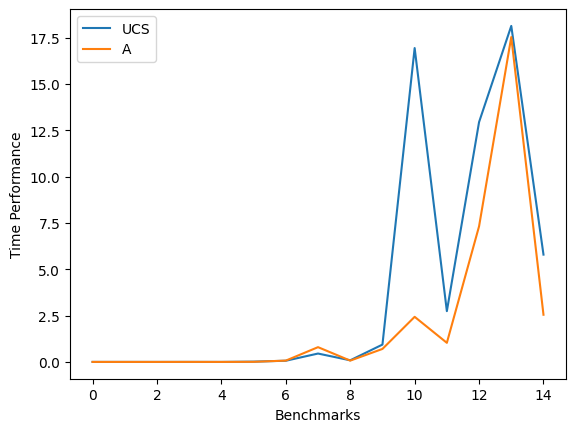

In [ ]:
import matplotlib.pyplot as plt
  
# create data
x1 = time_list_UCS
x2 = time_list_A
y = [i for i in range(15)]
  
# plot lines
plt.plot(y, x1, label = "UCS")
plt.plot(y, x2, label = "A")

plt.xlabel("Benchmarks")
plt.ylabel("Time Performance")

plt.legend()
plt.show()

###For Easy Instances

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
time_list_UCS_Easy = list()
mean_time = list()

for i in listOfEasyMazes:
  for j in range(30): #we iterating 30 times for decreasing error and outlier rate
    S = Search(i)
    start_time = time.time()
    S.UCS()
    end_time = time.time() - start_time
    mean_time.append(end_time)
  mean = Mean(mean_time)
  time_list_UCS_Easy.append(mean)
  mean_time = []

time_list_UCS_Easy

[0.0014971335728963216,
 0.0020943403244018553,
 0.0010970036188761394,
 0.0026927868525187175,
 0.0011313597361246744]

In [ ]:
time_list_A_Easy = list()
mean_time = list()

for i in listOfEasyMazes:
  for j in range(30): #we iterating 30 times for decreasing error and outlier rate
    S = Search(i)
    start_time = time.time()
    S.A_Search()
    end_time = time.time() - start_time
    mean_time.append(end_time)
  mean = Mean(mean_time)
  time_list_A_Easy.append(mean)
  mean_time = []

time_list_A_Easy

[0.0011669238408406576,
 0.0011291980743408203,
 0.0008976936340332031,
 0.0021940151850382487,
 0.0009629646937052409]

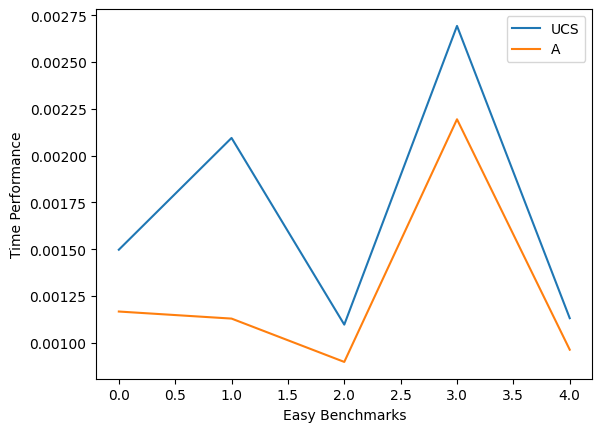

In [ ]:
# create data
x1 = time_list_UCS_Easy
x2 = time_list_A_Easy
y = [i for i in range(5)]
  
# plot lines
plt.plot(y, x1, label = "UCS")
plt.plot(y, x2, label = "A")

plt.xlabel("Easy Benchmarks")
plt.ylabel("Time Performance")

plt.legend()
plt.show()

###For Normal Instances

In [ ]:
time_list_UCS_Normal = list()
mean_time = list()

for i in listOfNormalMazes:
  for j in range(30): #we iterating 30 times for decreasing error and outlier rate
    S = Search(i)
    start_time = time.time()
    S.UCS()
    end_time = time.time() - start_time
    mean_time.append(end_time)
  mean = Mean(mean_time)
  time_list_UCS_Normal.append(mean)
  mean_time = []

time_list_UCS_Normal

[0.016734846433003745,
 0.0669825792312622,
 0.4517853021621704,
 0.08940529028574626,
 0.9072721163431804]

In [ ]:
time_list_A_Normal = list()
mean_time = list()

for i in listOfNormalMazes:
  for j in range(30): #we iterating 30 times for decreasing error and outlier rate
    S = Search(i)
    start_time = time.time()
    S.A_Search()
    end_time = time.time() - start_time
    mean_time.append(end_time)
  mean = Mean(mean_time)
  time_list_A_Normal.append(mean)
  mean_time = []

time_list_A_Normal

[0.0069526751836140955,
 0.07197221914927164,
 0.7940956513086955,
 0.07279450098673503,
 0.6986200888951619]

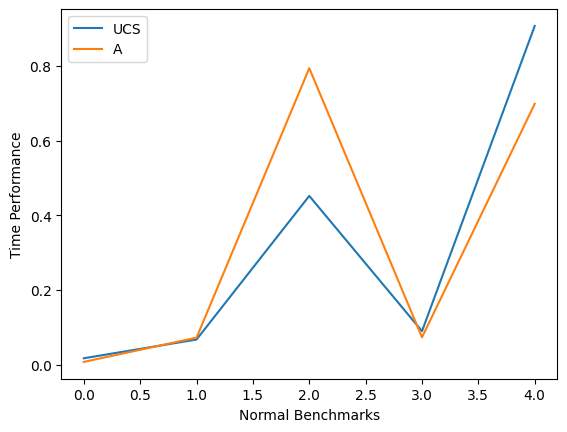

In [ ]:
# create data
x1 = time_list_UCS_Normal
x2 = time_list_A_Normal
y = [i for i in range(5)]
  
# plot lines
plt.plot(y, x1, label = "UCS")
plt.plot(y, x2, label = "A")

plt.xlabel("Normal Benchmarks")
plt.ylabel("Time Performance")

plt.legend()
plt.show()

###For Hard Instances

In [ ]:
time_list_UCS_Hard = list()
mean_time = list()

for i in listOfHardMazes:
  for j in range(30): #we iterating 30 times for decreasing error and outlier rate
    S = Search(i)
    start_time = time.time()
    S.UCS()
    end_time = time.time() - start_time
    mean_time.append(end_time)
  mean = Mean(mean_time)
  time_list_UCS_Hard.append(mean)
  mean_time = []

time_list_UCS_Hard

[15.840710751215617,
 2.6658455530802407,
 12.448620629310607,
 16.660051035881043,
 5.2522344509760535]

In [ ]:
time_list_A_Hard = list()
mean_time = list()

for i in listOfHardMazes:
  for j in range(30): #we iterating 30 times for decreasing error and outlier rate
    S = Search(i)
    start_time = time.time()
    S.A_Search()
    end_time = time.time() - start_time
    mean_time.append(end_time)
  mean = Mean(mean_time)
  time_list_A_Hard.append(mean)
  mean_time = []

time_list_A_Hard

[2.3722476800282797,
 1.0246365626653036,
 7.091752378145854,
 16.88855703671773,
 2.5883158604303995]

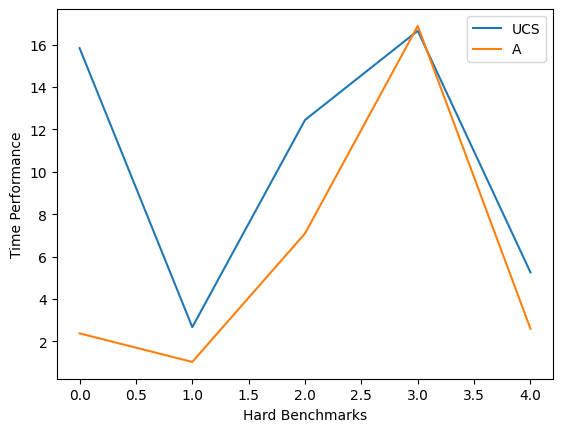

In [ ]:
# create data
x1 = time_list_UCS_Hard
x2 = time_list_A_Hard
y = [i for i in range(5)]
  
# plot lines
plt.plot(y, x1, label = "UCS")
plt.plot(y, x2, label = "A")

plt.xlabel("Hard Benchmarks")
plt.ylabel("Time Performance")

plt.legend()
plt.show()

##Space Complexity Analysis

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!pip install memory-profiler
!pip install line_profiler

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


     ---------------------------------------- 83.2/83.2 KB 1.2 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
%load_ext memory_profiler
%load_ext line_profiler

###For All Instances

####UCS

In [ ]:
Memory_List_UCS = []

%load_ext memory_profiler

for i in listOfMazes:
    mean_mem = []
    for j in range(30):
        S = Search(i)

        # Define a wrapper function for UCS()
        def Run_UCS():
            S.UCS()

        # Use memory_profiler to measure memory usage of Run_UCS()
        mem_usage = %memit -o Run_UCS()

        # Append the maximum memory usage to mean_mem
        mean_mem.append(max(mem_usage.mem_usage) / (1024 ** 2))

    mean = Mean(mean_mem)
    print(f"Memory usage: {mean} MB")
    Memory_List_UCS.append(mean)

Memory_List_UCS

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 102.37 MiB, increment: 0.39 MiB
peak memory: 102.38 MiB, increment: 0.00 MiB
peak memory: 102.38 MiB, increment: 0.00 MiB
peak memory: 102.38 MiB, increment: 0.00 MiB
peak memory: 102.38 MiB, increment: 0.00 MiB
peak memory: 102.38 MiB, increment: 0.00 MiB
peak memory: 102.38 MiB, increment: 0.00 MiB
peak memory: 102.38 MiB, increment: 0.00 MiB
peak memory: 102.38 MiB, increment: 0.00 MiB
peak memory: 102.38 MiB, increment: 0.00 MiB
peak memory: 102.38 MiB, increment: 0.00 MiB
peak memory: 102.38 MiB, increment: 0.00 MiB
peak memory: 102.38 MiB, increment: 0.00 MiB
peak memory: 102.38 MiB, increment: 0.00 MiB
peak memory: 102.38 MiB, increment: 0.00 MiB
peak memory: 102.38 MiB, increment: 0.00 MiB
peak memory: 102.38 MiB, increment: 0.00 MiB
peak memory: 102.38 MiB, increment: 0.00 MiB
peak memory: 102.38 MiB, increment: 0.00 MiB
peak memory: 102.38 MiB, increment: 0.00 MiB
pe

[9.763228396574656e-05,
 9.763451913992564e-05,
 9.76361334323883e-05,
 9.763774772485098e-05,
 9.763985872268677e-05,
 9.763985872268677e-05,
 9.763985872268677e-05,
 9.772156675656637e-05,
 9.772181510925293e-05,
 9.772181510925293e-05,
 0.00010611551503340404,
 0.00010241617759068808,
 0.00010495533545811971,
 0.00010499432682991028,
 0.00010215466221173605]

####A*

In [ ]:
Memory_List_A = []

%load_ext memory_profiler

for i in listOfMazes:
    mean_mem = []
    for j in range(30):
        S = Search(i)

        # Define a wrapper function for UCS()
        def Run_UCS():
            S.A_Search()

        # Use memory_profiler to measure memory usage of Run_UCS()
        mem_usage = %memit -o Run_UCS()

        # Append the maximum memory usage to mean_mem
        mean_mem.append(max(mem_usage.mem_usage) / (1024 ** 2))

    mean = Mean(mean_mem)
    print(f"Memory usage: {mean} MB")
    Memory_List_A.append(mean)

Memory_List_A

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 106.56 MiB, increment: 0.00 MiB
peak memory: 105.56 MiB, increment: 0.00 MiB
peak memory: 105.56 MiB, increment: 0.00 MiB
peak memory: 105.56 MiB, increment: 0.00 MiB
peak memory: 105.56 MiB, increment: 0.00 MiB
peak memory: 105.56 MiB, increment: 0.00 MiB
peak memory: 105.56 MiB, increment: 0.00 MiB
peak memory: 105.56 MiB, increment: 0.00 MiB
peak memory: 105.56 MiB, increment: 0.00 MiB
peak memory: 105.56 MiB, increment: 0.00 MiB
peak memory: 105.56 MiB, increment: 0.00 MiB
peak memory: 105.56 MiB, increment: 0.00 MiB
peak memory: 105.56 MiB, increment: 0.00 MiB
peak memory: 105.56 MiB, increment: 0.00 MiB
peak memory: 105.56 MiB, increment: 0.00 MiB
peak memory: 105.56 MiB, increment: 0.00 MiB
peak memory: 105.56 MiB, increment: 0.00 MiB
peak memory: 105.56 MiB, increment: 0.00 MiB
peak memory: 105.56 MiB, increment: 0.00 MiB
peak memory: 105.56 MiB, increment: 0.00 MiB
pe

[0.00010070403416951497,
 0.00010067224502563477,
 0.00010067224502563477,
 0.00010067224502563477,
 0.00010067224502563477,
 0.00010067224502563477,
 0.00010068143407503764,
 0.00010050013661384582,
 9.973719716072083e-05,
 9.972738722960154e-05,
 9.971956411997477e-05,
 9.971956411997477e-05,
 9.973073999087016e-05,
 0.00010257388154665629,
 0.0001017250120639801]

####Plot

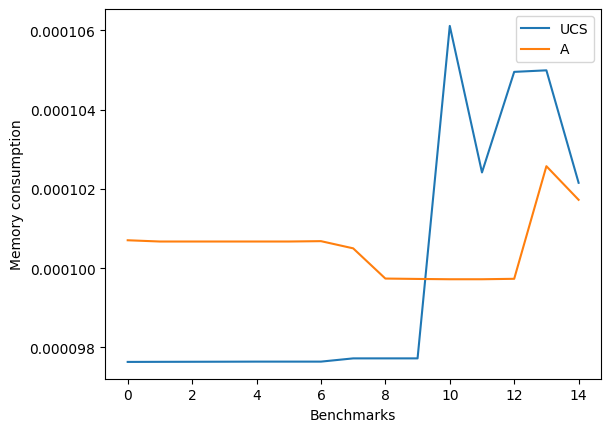

In [ ]:
# create data
x1 = Memory_List_UCS
x2 = Memory_List_A
y = [i for i in range(15)]
  
# plot lines
plt.plot(y, x1, label = "UCS")
plt.plot(y, x2, label = "A")

plt.xlabel("Benchmarks")
plt.ylabel("Memory consumption")

plt.legend()
plt.show()

###For Easy Instances

In [ ]:
Memory_List_UCS_Easy = []

%load_ext memory_profiler

for i in listOfEasyMazes:
  mean_mem = []
  for j in range(30):
      S = Search(i)

      # Define a wrapper function for UCS()
      def Run_UCS():
          S.UCS()

      # Use memory_profiler to measure memory usage of Run_UCS()
      mem_usage = %memit -o Run_UCS()

      # Append the maximum memory usage to mean_mem
      mean_mem.append(max(mem_usage.mem_usage) / (1024 ** 2))

  mean = Mean(mean_mem)
  print(f"Memory usage: {mean} MB")
  Memory_List_UCS_Easy.append(mean)
Memory_List_UCS_Easy

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 106.88 MiB, increment: 0.00 MiB
peak memory: 105.88 MiB, increment: 0.00 MiB
peak memory: 104.88 MiB, increment: 0.00 MiB
peak memory: 104.88 MiB, increment: 0.00 MiB
peak memory: 104.88 MiB, increment: 0.00 MiB
peak memory: 104.88 MiB, increment: 0.00 MiB
peak memory: 104.88 MiB, increment: 0.00 MiB
peak memory: 104.88 MiB, increment: 0.00 MiB
peak memory: 104.88 MiB, increment: 0.00 MiB
peak memory: 104.88 MiB, increment: 0.00 MiB
peak memory: 104.88 MiB, increment: 0.00 MiB
peak memory: 104.88 MiB, increment: 0.00 MiB
peak memory: 104.88 MiB, increment: 0.00 MiB
peak memory: 104.88 MiB, increment: 0.00 MiB
peak memory: 104.88 MiB, increment: 0.00 MiB
peak memory: 104.88 MiB, increment: 0.00 MiB
peak memory: 104.88 MiB, increment: 0.00 MiB
peak memory: 104.88 MiB, increment: 0.00 MiB
peak memory: 104.88 MiB, increment: 0.00 MiB
peak memory: 104.88 MiB, increment: 0.00 MiB
pe

[0.00010011568665504455,
 0.00010002031922340393,
 0.00010002031922340393,
 0.00010002031922340393,
 0.00010003422697385152]

In [ ]:
Memory_List_A_Easy = []

%load_ext memory_profiler

for i in listOfEasyMazes:
  mean_mem = []
  for j in range(30):
      S = Search(i)

      # Define a wrapper function for UCS()
      def Run_UCS():
          S.A_Search()

      # Use memory_profiler to measure memory usage of Run_UCS()
      mem_usage = %memit -o Run_UCS()

      # Append the maximum memory usage to mean_mem
      mean_mem.append(max(mem_usage.mem_usage) / (1024 ** 2))

  mean = Mean(mean_mem)
  print(f"Memory usage: {mean} MB")
  Memory_List_A_Easy.append(mean)
Memory_List_A_Easy

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 104.89 MiB, increment: 0.00 MiB
peak memory: 104.89 MiB, increment: 0.00 MiB
peak memory: 104.89 MiB, increment: 0.00 MiB
peak memory: 104.89 MiB, increment: 0.00 MiB
peak memory: 104.89 MiB, increment: 0.00 MiB
peak memory: 104.89 MiB, increment: 0.00 MiB
peak memory: 104.89 MiB, increment: 0.00 MiB
peak memory: 104.89 MiB, increment: 0.00 MiB
peak memory: 104.89 MiB, increment: 0.00 MiB
peak memory: 104.89 MiB, increment: 0.00 MiB
peak memory: 104.89 MiB, increment: 0.00 MiB
peak memory: 104.89 MiB, increment: 0.00 MiB
peak memory: 104.89 MiB, increment: 0.00 MiB
peak memory: 104.89 MiB, increment: 0.00 MiB
peak memory: 104.89 MiB, increment: 0.00 MiB
peak memory: 104.89 MiB, increment: 0.00 MiB
peak memory: 104.89 MiB, increment: 0.00 MiB
peak memory: 104.89 MiB, increment: 0.00 MiB
peak memory: 104.89 MiB, increment: 0.00 MiB
peak memory: 104.89 MiB, increment: 0.00 MiB
pe

[0.00010003522038459778,
 0.00010003522038459778,
 0.00010002131263415019,
 0.00010002031922340393,
 0.00010002031922340393]

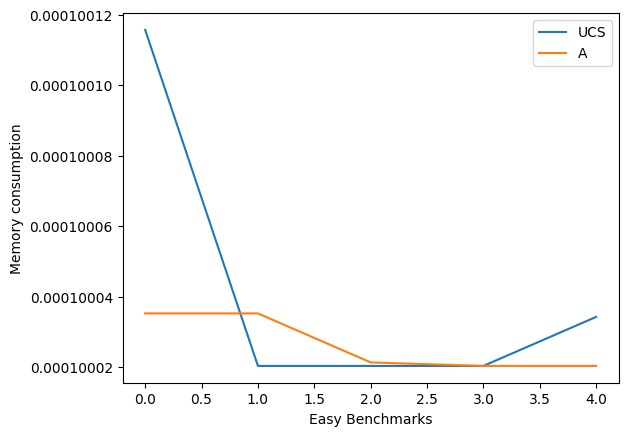

In [ ]:
# create data
x1 = Memory_List_UCS_Easy
x2 = Memory_List_A_Easy
y = [i for i in range(5)]
  
# plot lines
plt.plot(y, x1, label = "UCS")
plt.plot(y, x2, label = "A")

plt.xlabel("Easy Benchmarks")
plt.ylabel("Memory consumption")

plt.legend()
plt.show()

###For Normal Instances

In [ ]:
Memory_List_UCS_Normal = []

%load_ext memory_profiler

for i in listOfNormalMazes:
  mean_mem = []
  for j in range(30):
      S = Search(i)

      # Define a wrapper function for UCS()
      def Run_UCS():
          S.UCS()

      # Use memory_profiler to measure memory usage of Run_UCS()
      mem_usage = %memit -o Run_UCS()

      # Append the maximum memory usage to mean_mem
      mean_mem.append(max(mem_usage.mem_usage) / (1024 ** 2))

  mean = Mean(mean_mem)
  print(f"Memory usage: {mean} MB")
  Memory_List_UCS_Normal.append(mean)
Memory_List_UCS_Normal

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 104.90 MiB, increment: 0.00 MiB
peak memory: 104.90 MiB, increment: 0.00 MiB
peak memory: 104.90 MiB, increment: 0.00 MiB
peak memory: 104.90 MiB, increment: 0.00 MiB
peak memory: 104.90 MiB, increment: 0.00 MiB
peak memory: 104.90 MiB, increment: 0.00 MiB
peak memory: 104.90 MiB, increment: 0.00 MiB
peak memory: 104.90 MiB, increment: 0.00 MiB
peak memory: 104.90 MiB, increment: 0.00 MiB
peak memory: 104.90 MiB, increment: 0.00 MiB
peak memory: 104.90 MiB, increment: 0.00 MiB
peak memory: 104.90 MiB, increment: 0.00 MiB
peak memory: 104.90 MiB, increment: 0.00 MiB
peak memory: 104.90 MiB, increment: 0.00 MiB
peak memory: 104.90 MiB, increment: 0.00 MiB
peak memory: 104.90 MiB, increment: 0.00 MiB
peak memory: 104.90 MiB, increment: 0.00 MiB
peak memory: 104.90 MiB, increment: 0.00 MiB
peak memory: 104.90 MiB, increment: 0.00 MiB
peak memory: 104.90 MiB, increment: 0.00 MiB
pe

[0.00010003894567489624,
 0.00010003894567489624,
 0.00010003894567489624,
 0.00010003894567489624,
 0.00010004043579101563]

In [ ]:
Memory_List_A_Normal = []

%load_ext memory_profiler

for i in listOfNormalMazes:
  mean_mem = []
  for j in range(30):
      S = Search(i)

      # Define a wrapper function for UCS()
      def Run_UCS():
          S.A_Search()

      # Use memory_profiler to measure memory usage of Run_UCS()
      mem_usage = %memit -o Run_UCS()

      # Append the maximum memory usage to mean_mem
      mean_mem.append(max(mem_usage.mem_usage) / (1024 ** 2))

  mean = Mean(mean_mem)
  print(f"Memory usage: {mean} MB")
  Memory_List_A_Normal.append(mean)
Memory_List_A_Normal

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 104.91 MiB, increment: 0.00 MiB
peak memory: 104.91 MiB, increment: 0.00 MiB
peak memory: 104.91 MiB, increment: 0.00 MiB
peak memory: 104.91 MiB, increment: 0.00 MiB
peak memory: 104.91 MiB, increment: 0.00 MiB
peak memory: 104.91 MiB, increment: 0.00 MiB
peak memory: 104.91 MiB, increment: 0.00 MiB
peak memory: 104.91 MiB, increment: 0.00 MiB
peak memory: 104.91 MiB, increment: 0.00 MiB
peak memory: 104.91 MiB, increment: 0.00 MiB
peak memory: 104.91 MiB, increment: 0.00 MiB
peak memory: 104.91 MiB, increment: 0.00 MiB
peak memory: 104.91 MiB, increment: 0.00 MiB
peak memory: 104.91 MiB, increment: 0.00 MiB
peak memory: 104.91 MiB, increment: 0.00 MiB
peak memory: 104.91 MiB, increment: 0.00 MiB
peak memory: 104.91 MiB, increment: 0.00 MiB
peak memory: 104.91 MiB, increment: 0.00 MiB
peak memory: 104.91 MiB, increment: 0.00 MiB
peak memory: 104.91 MiB, increment: 0.00 MiB
pe

[0.00010005384683609009,
 0.00010005384683609009,
 0.00010005384683609009,
 0.0001000399390856425,
 0.00010003894567489624]

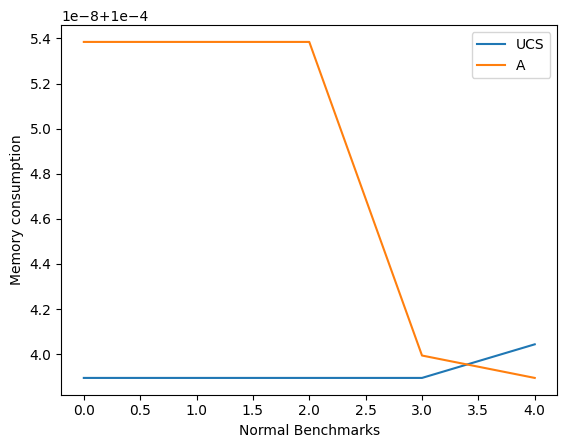

In [ ]:
# create data
x1 = Memory_List_UCS_Normal
x2 = Memory_List_A_Normal
y = [i for i in range(5)]
  
# plot lines
plt.plot(y, x1, label = "UCS")
plt.plot(y, x2, label = "A")

plt.xlabel("Normal Benchmarks")
plt.ylabel("Memory consumption")

plt.legend()
plt.show()

###For Hard Instances

In [ ]:
Memory_List_UCS_Hard = []

%load_ext memory_profiler

for i in listOfHardMazes:
  mean_mem = []
  for j in range(30):
      S = Search(i)

      # Define a wrapper function for UCS()
      def Run_UCS():
          S.UCS()

      # Use memory_profiler to measure memory usage of Run_UCS()
      mem_usage = %memit -o Run_UCS()

      # Append the maximum memory usage to mean_mem
      mean_mem.append(max(mem_usage.mem_usage) / (1024 ** 2))

  mean = Mean(mean_mem)
  print(f"Memory usage: {mean} MB")
  Memory_List_UCS_Hard.append(mean)
Memory_List_UCS_Hard

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 111.27 MiB, increment: 7.14 MiB
peak memory: 111.34 MiB, increment: 3.82 MiB
peak memory: 111.34 MiB, increment: 1.81 MiB
peak memory: 111.34 MiB, increment: 0.81 MiB
peak memory: 111.34 MiB, increment: 1.81 MiB
peak memory: 111.34 MiB, increment: 1.81 MiB
peak memory: 111.34 MiB, increment: 1.81 MiB
peak memory: 111.36 MiB, increment: 1.83 MiB
peak memory: 111.36 MiB, increment: 2.81 MiB
peak memory: 111.36 MiB, increment: 0.81 MiB
peak memory: 111.30 MiB, increment: 2.76 MiB
peak memory: 111.30 MiB, increment: 1.76 MiB
peak memory: 111.34 MiB, increment: 2.80 MiB
peak memory: 111.29 MiB, increment: 0.76 MiB
peak memory: 111.25 MiB, increment: 2.72 MiB
peak memory: 111.25 MiB, increment: 1.76 MiB
peak memory: 111.25 MiB, increment: 2.76 MiB
peak memory: 111.25 MiB, increment: 1.76 MiB
peak memory: 111.25 MiB, increment: 2.76 MiB
peak memory: 111.25 MiB, increment: 1.76 MiB
pe

[0.00010613948106765747,
 0.00010109171271324157,
 0.00010511676470438639,
 0.00010516643524169922,
 0.00010243753592173258]

In [ ]:
Memory_List_A_Hard = []

%load_ext memory_profiler

for i in listOfHardMazes:
  mean_mem = []
  for j in range(30):
      S = Search(i)

      # Define a wrapper function for UCS()
      def Run_UCS():
          S.A_Search()

      # Use memory_profiler to measure memory usage of Run_UCS()
      mem_usage = %memit -o Run_UCS()

      # Append the maximum memory usage to mean_mem
      mean_mem.append(max(mem_usage.mem_usage) / (1024 ** 2))

  mean = Mean(mean_mem)
  print(f"Memory usage: {mean} MB")
  Memory_List_A_Hard.append(mean)
Memory_List_A_Hard

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 106.73 MiB, increment: 0.00 MiB
peak memory: 105.73 MiB, increment: 0.00 MiB
peak memory: 105.73 MiB, increment: 0.00 MiB
peak memory: 105.73 MiB, increment: 0.00 MiB
peak memory: 105.73 MiB, increment: 0.00 MiB
peak memory: 105.73 MiB, increment: 0.00 MiB
peak memory: 105.73 MiB, increment: 0.00 MiB
peak memory: 105.73 MiB, increment: 0.00 MiB
peak memory: 105.73 MiB, increment: 0.00 MiB
peak memory: 105.73 MiB, increment: 0.00 MiB
peak memory: 105.73 MiB, increment: 0.00 MiB
peak memory: 105.73 MiB, increment: 0.00 MiB
peak memory: 105.73 MiB, increment: 0.00 MiB
peak memory: 105.73 MiB, increment: 0.00 MiB
peak memory: 105.73 MiB, increment: 0.00 MiB
peak memory: 105.73 MiB, increment: 0.00 MiB
peak memory: 105.73 MiB, increment: 0.00 MiB
peak memory: 105.73 MiB, increment: 0.00 MiB
peak memory: 105.73 MiB, increment: 0.00 MiB
peak memory: 105.73 MiB, increment: 0.00 MiB
pe

[0.0001008679469426473,
 0.00010082274675369263,
 0.0001008264720439911,
 0.00010271854698657989,
 0.0001018419861793518]

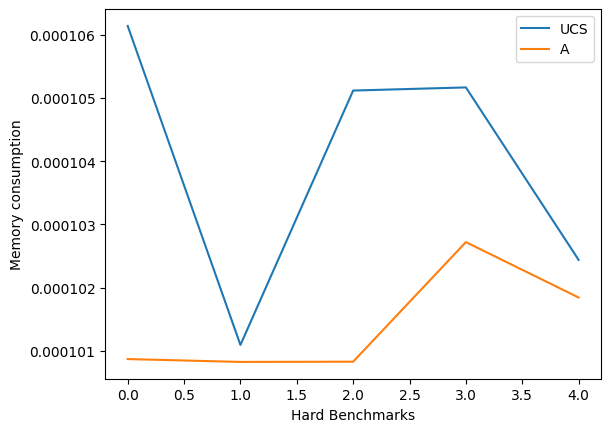

In [ ]:
# create data
x1 = Memory_List_UCS_Hard
x2 = Memory_List_A_Hard
y = [i for i in range(5)]
  
# plot lines
plt.plot(y, x1, label = "UCS")
plt.plot(y, x2, label = "A")

plt.xlabel("Hard Benchmarks")
plt.ylabel("Memory consumption")

plt.legend()
plt.show()